
Okay, its time to start looking at the data...I've procrastinated for as long as I can while still potentially getting 8 hrs of sleep tonight.

welp its now 4 hours later and I've gotten no where except for scrapping the first project.

# Accident Data


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd
from pandas import DataFrame, Series
import geopandas as gpd
import numpy as np
import folium
import seaborn as sns; sns.set()
import contextily as ctx
from collections import Counter

np.random.seed(42)
plt.rcParams.update({'font.size': 13})

In [2]:
df_test = DataFrame()
df_test10 = DataFrame()
df_test100 = DataFrame()
df_tax = DataFrame()
df_county_people = DataFrame()

In [3]:
df_test = pd.read_csv('../data/US_Accidents_Dec19.csv')

In [4]:
df_tax = pd.read_csv('../data/county_level_datasets/Income.csv')

In [5]:
df_county_people = pd.read_csv('../data/county_level_datasets/People.csv')

In [6]:
df_test10 = df_test.sample(frac =.1)
df_test100 = df_test.sample(frac =.01)

In [7]:
df_nyc = pd.DataFrame()
df_nyc = df_test[(df_test['Start_Lat'] > 40.6) &
                (df_test['Start_Lat'] < 41) &
                (df_test['Start_Lng'] > -74.15) &
                (df_test['Start_Lng'] < -73.85)
               ]
len(df_nyc)

41372

In [10]:
df_test.shape

(2974335, 49)

(2974335, 49)

~ 3 million rows of data

In [11]:
head = df_test.head(3)

In [12]:
head

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  

[3 rows x 49 columns]

49 columns several of which are start/end

In [7]:
for col in df_test.columns: 
    print(col)

ID
Source
TMC
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [34]:
print(df_test['Start_Time'])
# clips the time string off the 5th element of the df
df_test['Start_Time'][5][-8:]

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
2974330    2019-08-23 18:03:25
2974331    2019-08-23 19:11:30
2974332    2019-08-23 19:00:21
2974333    2019-08-23 19:00:21
2974334    2019-08-23 18:52:06
Name: Start_Time, Length: 2974335, dtype: object


'07:44:26'

Dates Range from:

2016 February 8th
to
2019 August 23rd


In [9]:
unique_Severity_list = []
for Severity in df_test['Severity']:
    if Severity not in unique_Severity_list:
        unique_Severity_list.append(Severity) 
for i in sorted(unique_Severity_list):
    print(i)

1
2
3
4


'Severity' ranges can be 1, 2, 3, or 4

In [10]:
len(df_test['Weather_Condition'].unique())

121

121 Unique Weather Conditions

In [83]:
weather_cond_dict = {}
weather_cond_tup_list = []

for cond in df_test['Weather_Condition']:
    if cond not in weather_cond_dict:
        weather_cond_dict[cond] = len(df_test[df_test['Weather_Condition'] == cond])

# Sort the list in population decsending order
weather_cond_tup_list = sorted(weather_cond_dict.items() , reverse=True, key=lambda x: x[1])       
weather_cond_tup_list.pop()
weather_cond_tup_list

[('Clear', 808171),
 ('Mostly Cloudy', 412528),
 ('Overcast', 382480),
 ('Fair', 335289),
 ('Partly Cloudy', 295439),
 ('Scattered Clouds', 204662),
 ('Light Rain', 141073),
 ('Cloudy', 115496),
 ('Light Snow', 42123),
 ('Haze', 34315),
 ('Rain', 32826),
 ('Fog', 22138),
 ('Heavy Rain', 12064),
 ('Light Drizzle', 10277),
 ('Light Thunderstorms and Rain', 4928),
 ('Snow', 4796),
 ('Thunderstorm', 4438),
 ('Fair / Windy', 3759),
 ('Smoke', 3602),
 ('Heavy Thunderstorms and Rain', 2483),
 ('Patches of Fog', 2386),
 ('Thunderstorms and Rain', 2215),
 ('Mist', 2204),
 ('Thunder in the Vicinity', 2177),
 ('T-Storm', 2161),
 ('Light Freezing Rain', 2132),
 ('Cloudy / Windy', 2097),
 ('Drizzle', 2044),
 ('Mostly Cloudy / Windy', 1987),
 ('Light Rain with Thunder', 1933),
 ('Thunder', 1661),
 ('Partly Cloudy / Windy', 1316),
 ('Heavy T-Storm', 1263),
 ('Heavy Snow', 1249),
 ('Shallow Fog', 1135),
 ('Light Rain / Windy', 1045),
 ('Light Freezing Fog', 1001),
 ('Wintry Mix', 799),
 ('Light Freezi

The weather condition frequency list is unadjustable unless we have the daily weather patterns.
In other words, we cannot compare 'Rain' to 'Heavy Rain' since there may have been many more days of 'Rain' then 'Heavy Rain'.

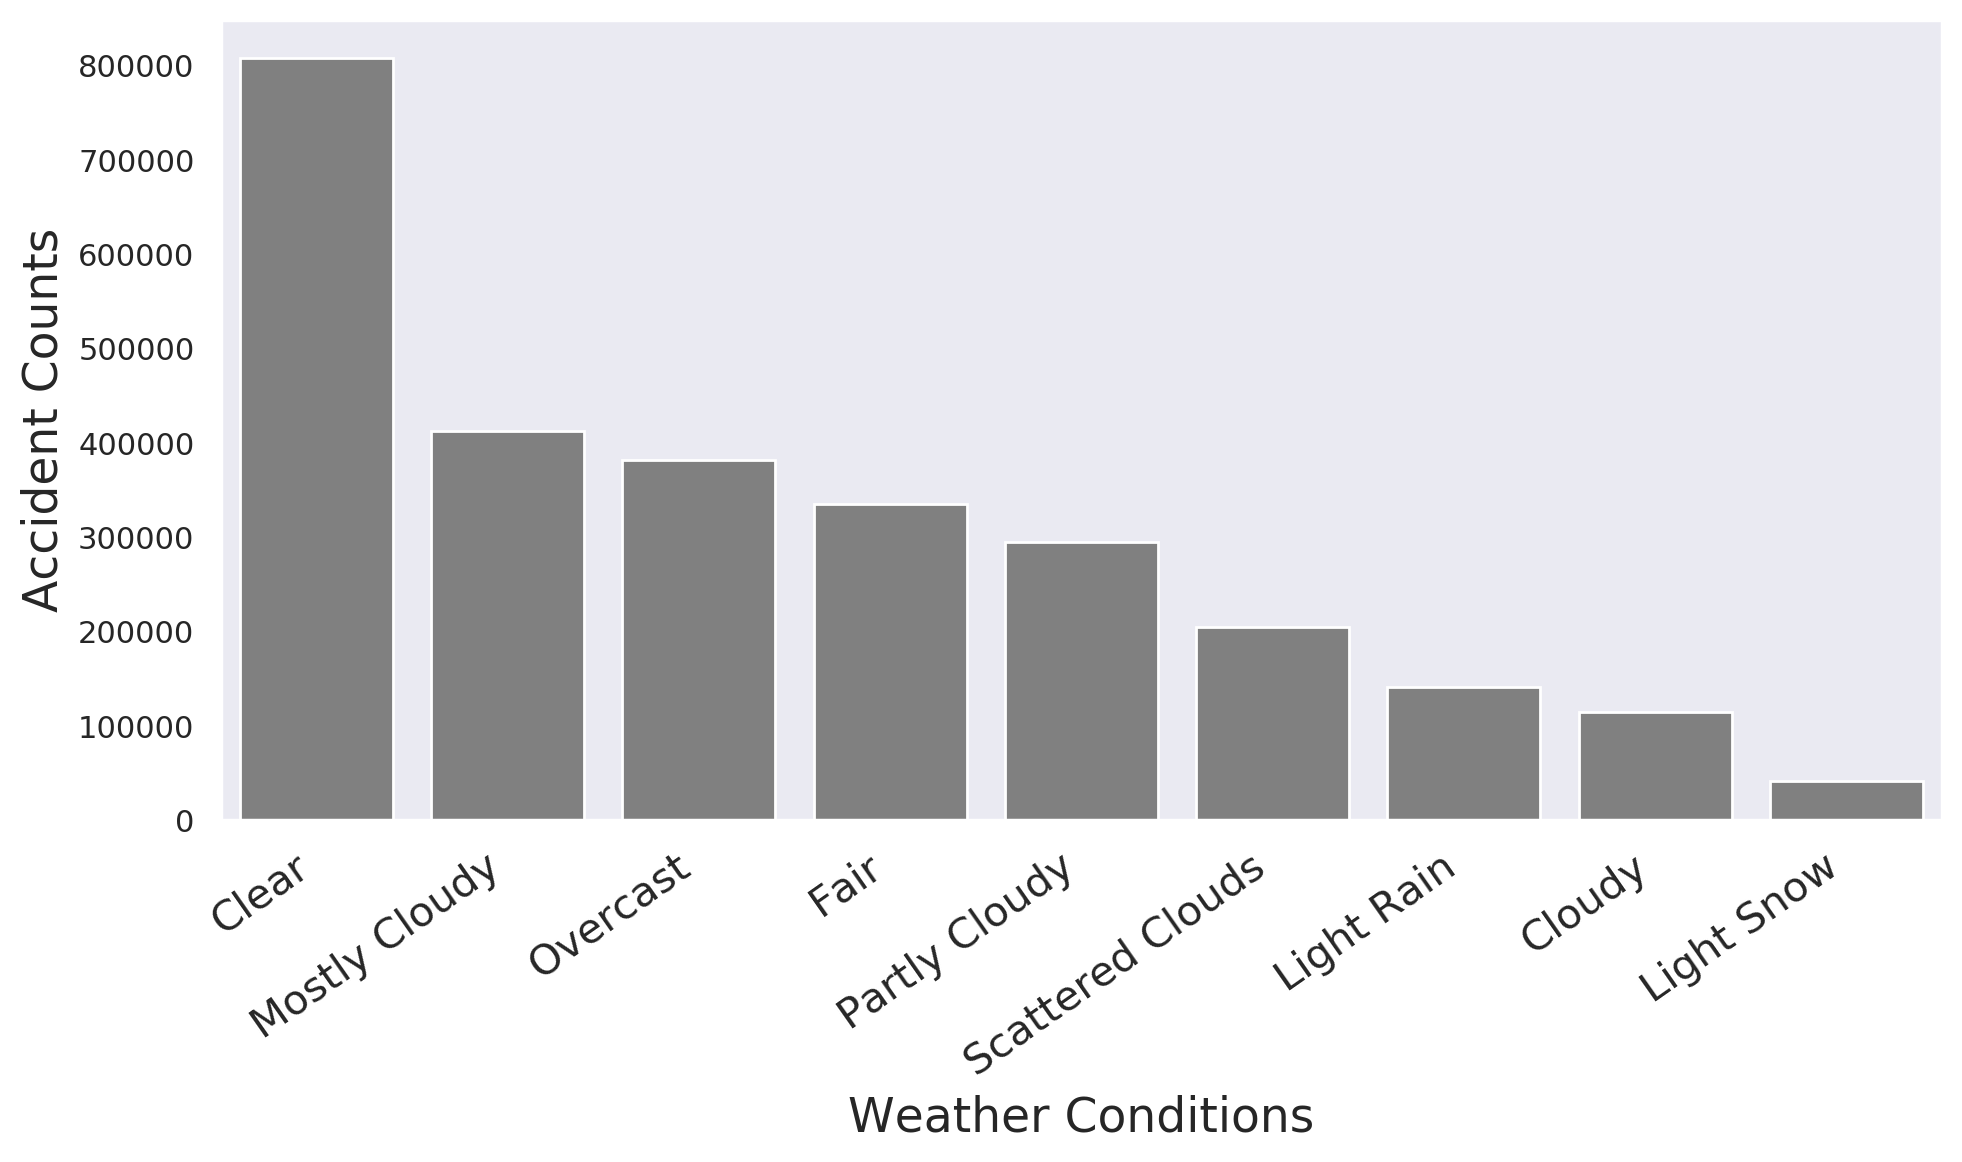

In [97]:
weather_cond_list = []
weather_cond_counts_list = []

for cond, count in weather_cond_tup_list:
    weather_cond_list.append(cond)
    weather_cond_counts_list.append(count)
    
   
fig, ax = plt.subplots(figsize=(10,6),dpi=200)
ax.bar(weather_cond_list, weather_cond_counts_list, color='grey',width=0.8)
ax.set_xlim([-0.5,8.5])

# ax.set_ylim([0,500])
plt.xticks(rotation=35, ha='right',fontsize=15)

plt.ylabel('Accident Counts',fontsize=17)
plt.xlabel('Weather Conditions',fontsize=17)

ax.grid(False)
plt.tight_layout()
plt.savefig('../img/weather_vs_count.png')

In [11]:
print('Max Temperature:', df_test['Temperature(F)'].max())
print('Min Temperature:', df_test['Temperature(F)'].min())   
print('Max Wind Speed:', df_test['Wind_Speed(mph)'].max())
print('Max Precip:', df_test['Precipitation(in)'].max())

Max Temperature: 170.6
Min Temperature: -77.8
Max Wind Speed: 822.8
Max Precip: 25.0


Max Temperature 170.6

Min Temperature -77.8

Max Wind Speed: 822.8

Max Precip: 25.0

....wat

In [12]:
num_unique_states = len(df_test['State'].unique())
print('# of unique states:',num_unique_states)
print('Alaska?')
'AK' in df_test['State'].unique()

# of unique states: 49
Alaska?


False

Accidents Records from 49 States

All states except Alaska

In [100]:
state_population_dict = {
'AL' : 3814879,
# 'AK' : 551562,
'AZ' : 5638481,
'AR' : 2317649,
'CA' : 30617582,
'CO' : 4499217,
'CT' : 2837847,
'DC' : 703608,
'DE' : 770192,
'FL' : 17247808,
'GA' : 8113542,
# 'HI' : 1116004,
'ID' : 1338864,
'IL' : 9853946,
'IN' : 5164245,
'IA' : 2428229,
'KS' : 2213064,
'KY' : 3464802,
'LA' : 3561164,
'ME' : 1095370,
'MD' : 4710993,
'MA' : 5539703,
'MI' : 7842924,
'MN' : 4336475,
'MS' : 2277566,
'MO' : 4766843,
'MT' : 840190,
'NE' : 1458334,
'NV' : 2387517,
'NH' : 1104458,
'NJ' : 6943612,
'NM' : 1620991,
'NY' : 15425262,
'NC' : 8187369,
'ND' : 581891,
'OH' : 9111081,
'OK' : 3004733,
'OR' : 3351175,
'PA' : 10167376,
'RI' : 854866,
'SC' : 4037531,
'SD' : 667558,
'TN' : 5319123,
'TX' : 21596071,
'UT' : 2274774,
'VT' : 509984,
'VA' : 6674671,
'WA' : 5951832,
'WV' : 1432580,
'WI' : 4555837,
'WY' : 445025
    }

In [101]:
state_acc_dict = {}
state_acc_tup_list = []
state_acc_adj_dict = {}
state_acc_adj_tup_list = []

for state in state_population_dict:
    if state not in state_acc_dict:
        state_acc_dict[state] = len(df_test[df_test['State'] == state])

# Sort the list in population decsending order
state_acc_tup_list = sorted(state_acc_dict.items() , reverse=True, key=lambda x: x[1])       
        
# Adjusted accident counts = 
# state accident counts (over3.5 years) /
# population of state /
# 3.5 to remove the year span
# 
for state, pop in state_acc_tup_list:
    state_acc_adj_dict[state] = (pop / state_population_dict[state] / 3.5)
state_acc_adj_tup_list = sorted(state_acc_adj_dict.items() , reverse=True, key=lambda x: x[1])       
state_acc_adj_tup_list

[('SC', 0.010380389118286116),
 ('CA', 0.0061888250072411706),
 ('OR', 0.006039672652129477),
 ('UT', 0.005198004599263802),
 ('NC', 0.00497142087315927),
 ('OK', 0.004877733134453449),
 ('NE', 0.004409140841535615),
 ('LA', 0.004210581548216097),
 ('MN', 0.004132849837713812),
 ('TX', 0.003943336333195582),
 ('FL', 0.0037064088707056903),
 ('RI', 0.0035036401695035914),
 ('VA', 0.003422619203681671),
 ('MI', 0.0032310835674479134),
 ('AZ', 0.003158398765300695),
 ('TN', 0.0031309672665963922),
 ('WA', 0.002945887681545543),
 ('GA', 0.002944636087596338),
 ('AL', 0.0027238459875510747),
 ('MD', 0.002627774775175546),
 ('NY', 0.0025523808190190127),
 ('CO', 0.002547998907365437),
 ('PA', 0.002540197476432745),
 ('IL', 0.002504870347661449),
 ('CT', 0.0022958048327280703),
 ('NJ', 0.0020550029087372476),
 ('NH', 0.0018273992440506694),
 ('OH', 0.0017518071832373287),
 ('MO', 0.0017389166912237003),
 ('MA', 0.001702721504848081),
 ('IN', 0.001661977141451876),
 ('DE', 0.001644858870070246

In [37]:
state_acc_tup_list[0:][1]

('TX', 298062)

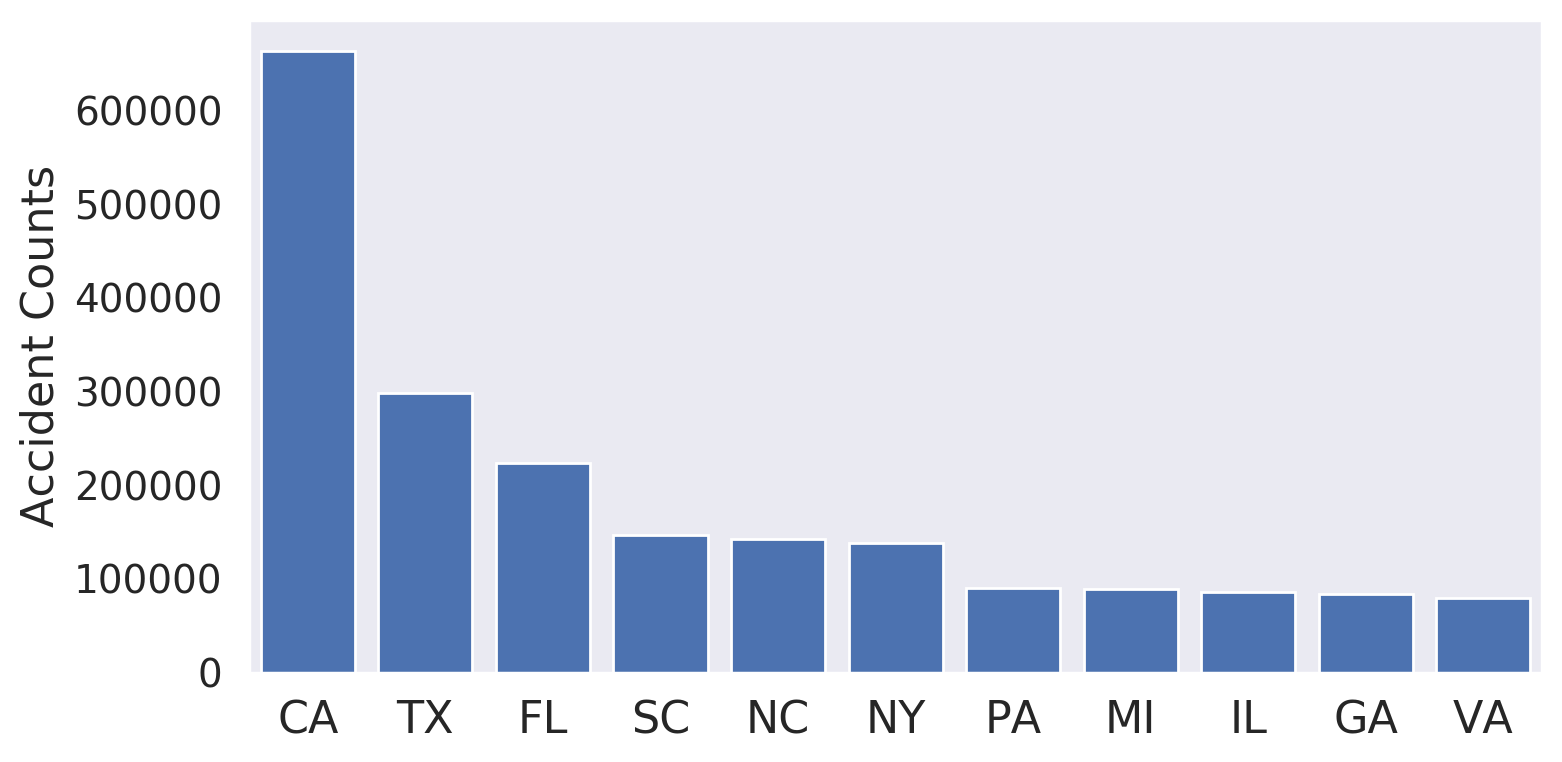

In [109]:
state_list_unadj = []
pop_list_unadj = []
for state, pop in state_acc_tup_list:
    state_list_unadj.append(state)
    pop_list_unadj.append(pop)
    
fig, ax = plt.subplots(figsize=(8,4),dpi=200)
ax.bar(state_list_unadj,pop_list_unadj, width=0.8)
ax.set_xlim([-0.5,10.5])
# ax.set_ylim([0,500])
ax.set_ylabel('Accident Counts', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
ax.grid(False)
plt.tight_layout()
plt.savefig('../img/weather_vs_count.png')

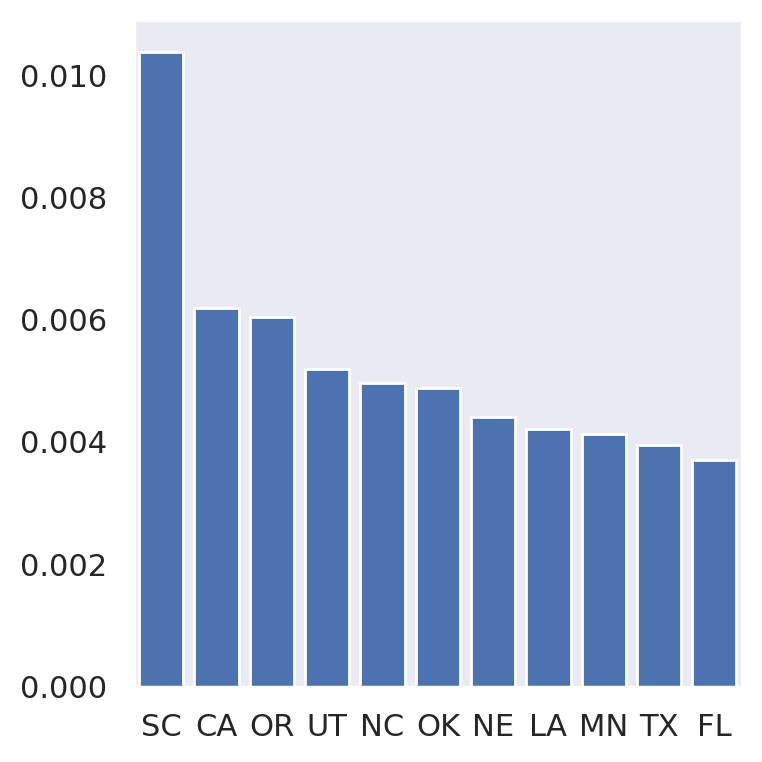

In [37]:
state_list_adj = []
pop_list_adj = []
for state, pop in state_acc_adj_tup_list:
    state_list_adj.append(state)
    pop_list_adj.append(pop)

fig, ax = plt.subplots(figsize=(4,4),dpi=200)
ax.bar(state_list_adj,pop_list_adj, width=0.8)
ax.set_xlim([-0.5,10.5])
# ax.set_ylim([0,500])
ax.grid(False)
plt.tight_layout()

In [111]:
state_list_unadj = []
pop_list_unadj = []
for state, pop in state_acc_tup_list:
    state_list_unadj.append(state)
    pop_list_unadj.append(pop)

state_list_adj = []
pop_list_adj = []
for state, pop in state_acc_adj_tup_list:
    state_list_adj.append(state)
    pop_list_adj.append(pop)

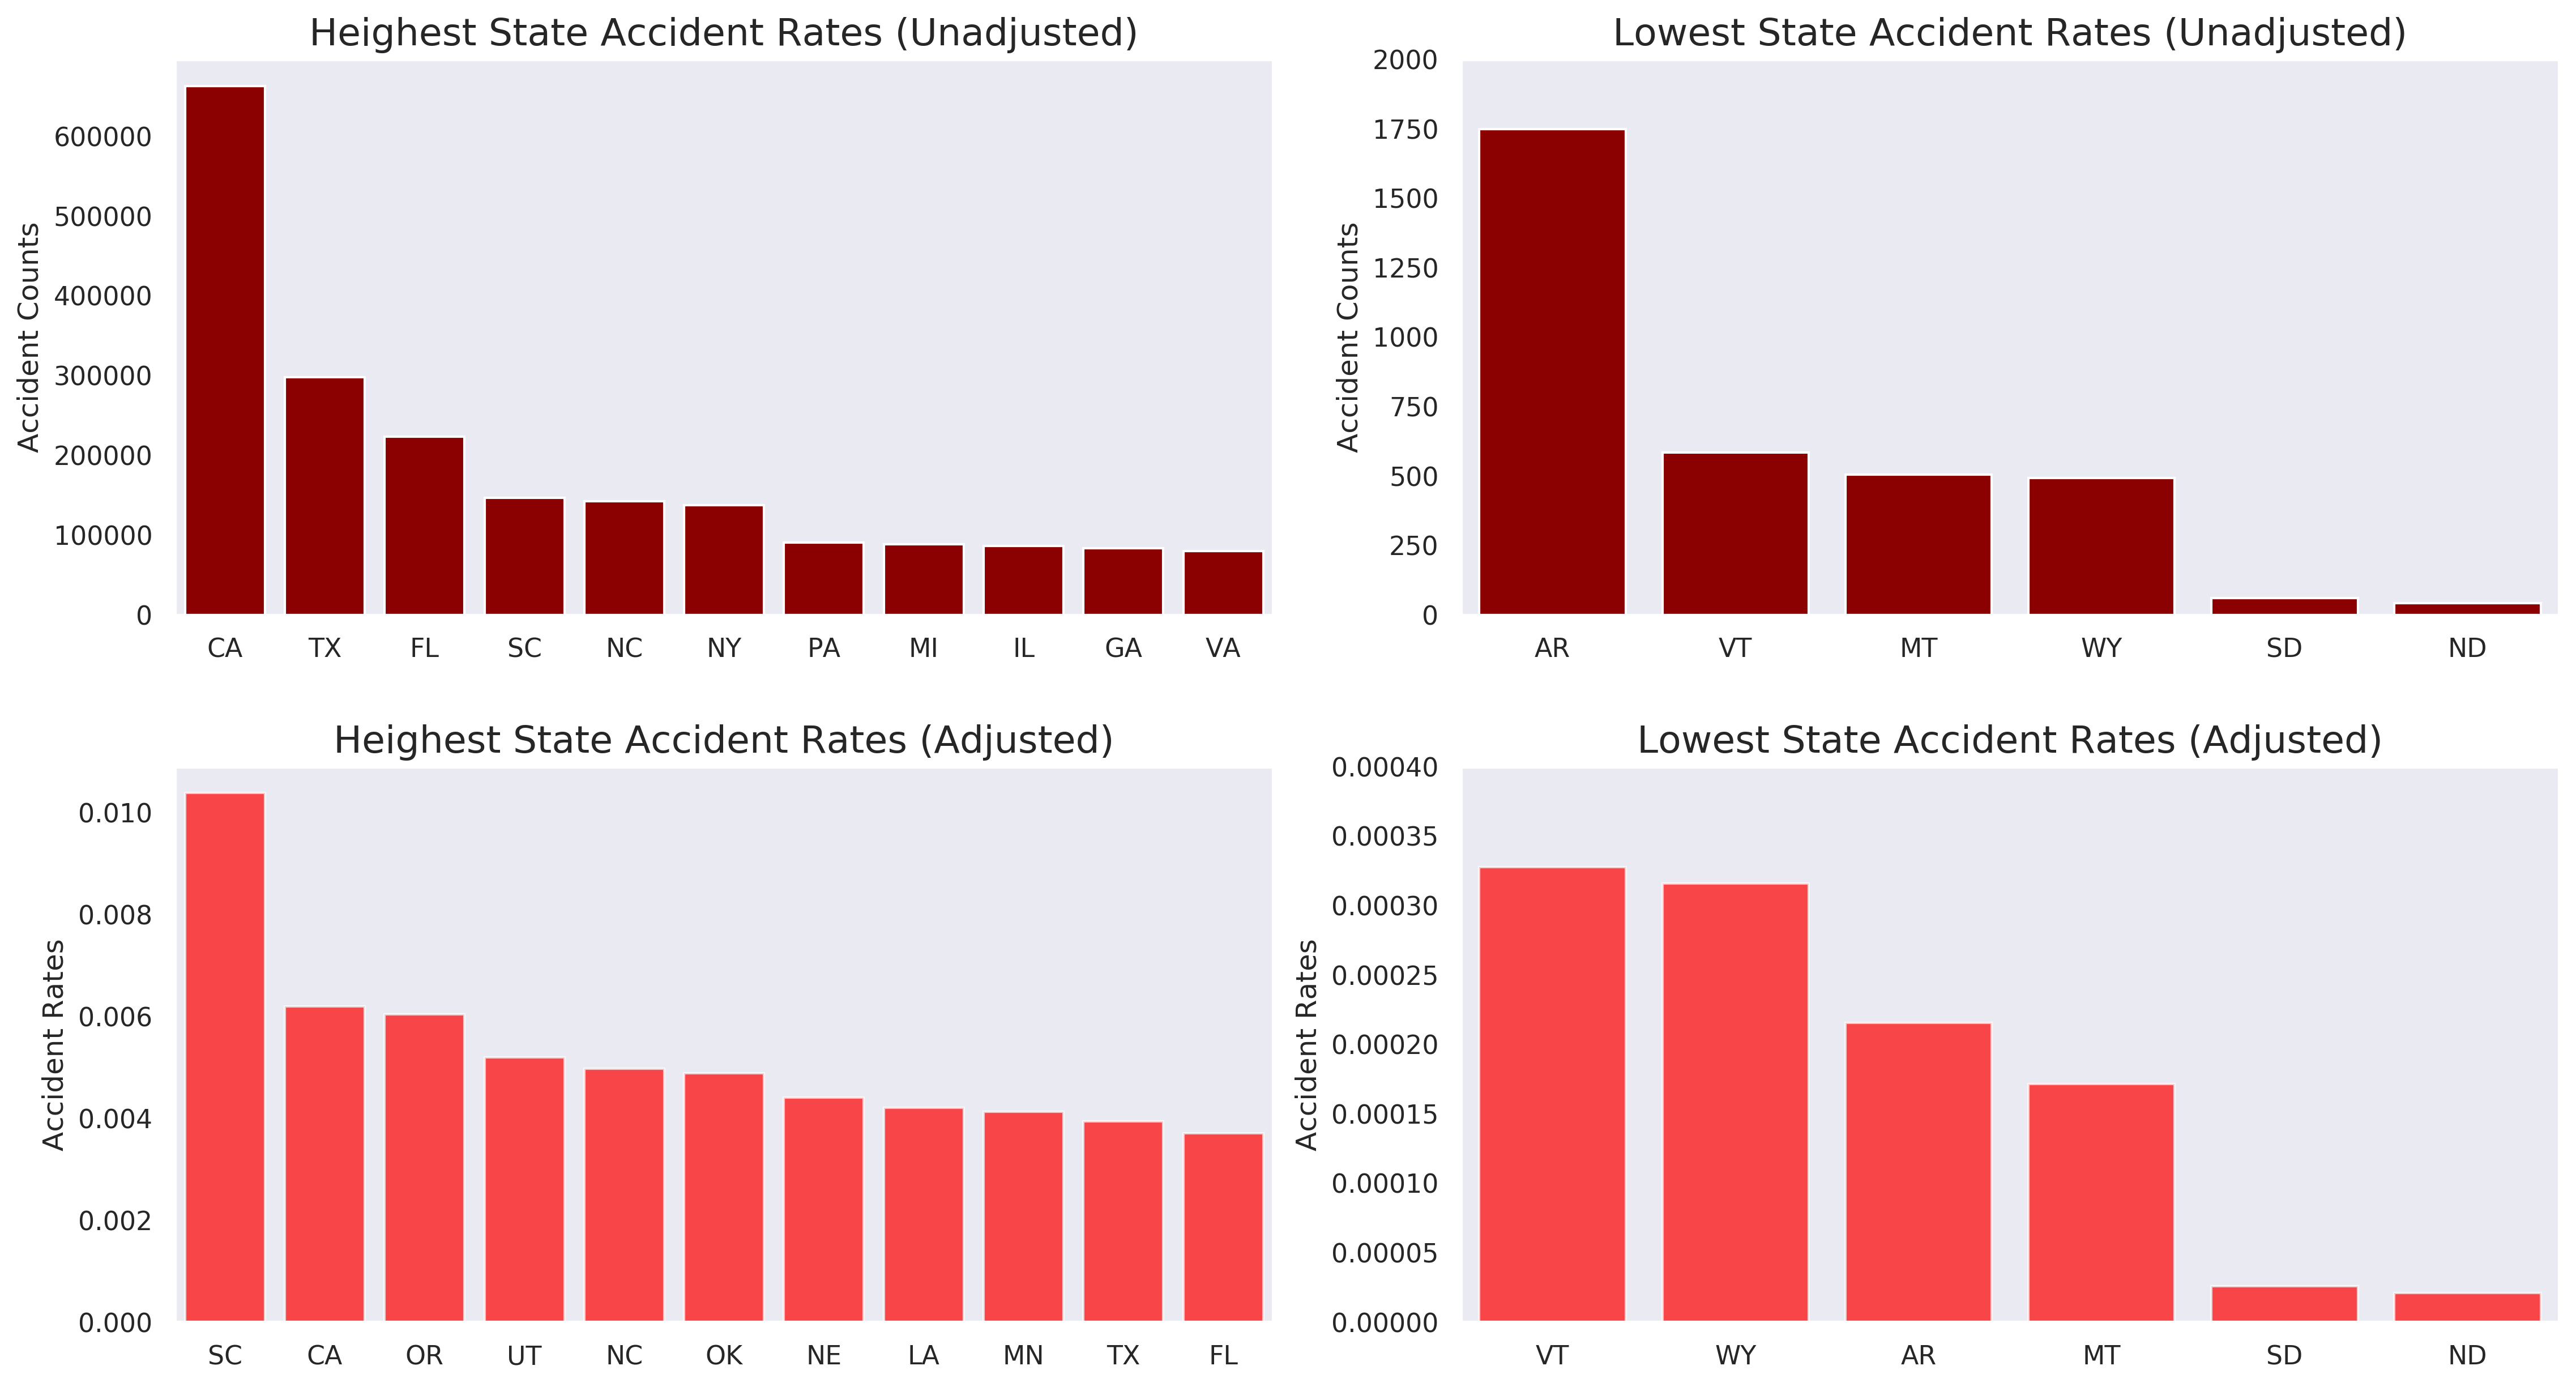

In [117]:
fig, axs = plt.subplots(2, 2, figsize=(15,8), dpi=300)



axs[0, 0].bar(state_list_unadj, pop_list_unadj, color='darkred')
axs[0, 0].set_title('Heighest State Accident Rates (Unadjusted)', fontsize=16)
axs[0, 0].set_xlim([-0.5,10.5])
axs[0, 0].set_ylabel("Accident Counts")
axs[0, 0].grid(False)

axs[0, 1].bar(state_list_unadj, pop_list_unadj, color='darkred')
axs[0, 1].set_title('Lowest State Accident Rates (Unadjusted)', fontsize=16)
axs[0, 1].set_xlim([42.5,48.5])
axs[0, 1].set_ylim([0,2000])
axs[0, 1].set_ylabel("Accident Counts")
axs[0, 1].grid(False)

axs[1, 0].bar(state_list_adj, pop_list_adj, color='red', alpha=0.7)
axs[1, 0].set_title('Heighest State Accident Rates (Adjusted)', fontsize=16)
axs[1, 0].set_xlim([-0.5,10.5])
axs[1, 0].set_ylabel("Accident Rates")
axs[1, 0].grid(False)

axs[1, 1].bar(state_list_adj, pop_list_adj, color='red', alpha=0.7)
axs[1, 1].set_title('Lowest State Accident Rates (Adjusted)', fontsize=16)
axs[1, 1].set_xlim([42.5,48.5])
axs[1, 1].set_ylim([0,0.0004])
axs[1, 1].set_ylabel("Accident Rates")
axs[1, 1].grid(False)

plt.tight_layout(pad=0.1, w_pad=0.7, h_pad=2)
# plt.savefig('../img/state_acc_count_rate.png')

In [13]:
df_test['Zipcode']

0               45424
1          43068-3402
2               45176
3               45417
4               45459
              ...    
2974330         92501
2974331         92108
2974332         92866
2974333         90230
2974334         92346
Name: Zipcode, Length: 2974335, dtype: object

In [16]:
df_test[df_test['Zipcode'] == 80203]

Empty DataFrame
Columns: [ID, Source, TMC, Severity, Start_Time, End_Time, Start_Lat, Start_Lng, End_Lat, End_Lng, Distance(mi), Description, Number, Street, Side, City, County, State, Zipcode, Country, Timezone, Airport_Code, Weather_Timestamp, Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Direction, Wind_Speed(mph), Precipitation(in), Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []

[0 rows x 49 columns]

In [8]:
df_test['Zipcode']

0               45424
1          43068-3402
2               45176
3               45417
4               45459
              ...    
2974330         92501
2974331         92108
2974332         92866
2974333         90230
2974334         92346
Name: Zipcode, Length: 2974335, dtype: object

In [26]:
unique_zip = df_test100['Zipcode'].value_counts()
unique_zip

91706         51
91761         49
90248         42
90703         38
75243         37
              ..
73120-6801     1
93908-9639     1
84119-3892     1
29073-7323     1
21711          1
Name: Zipcode, Length: 13576, dtype: int64

In [32]:
unique_zip_dict = {}
for key, counts in zip(df_test100['Zipcode'].value_counts().index.tolist(),  df_test100['Zipcode'].value_counts()):
    unique_zip_dict[key] = counts
unique_zip_dict

{'91706': 51,
 '91761': 49,
 '90248': 42,
 '90703': 38,
 '75243': 37,
 '94607': 37,
 '91765': 36,
 '95033': 36,
 '92507': 35,
 '94551': 32,
 '90650': 32,
 '91403': 32,
 '27606': 32,
 '90027': 32,
 '28205': 32,
 '91748': 32,
 '28208': 31,
 '27607': 31,
 '75207': 31,
 '90805': 31,
 '30312': 30,
 '92407': 30,
 '92324': 30,
 '90040': 30,
 '78744': 30,
 '92108': 30,
 '77024': 29,
 '28273': 29,
 '91342': 28,
 '90031': 27,
 '94710': 27,
 '90230': 27,
 '75217': 27,
 '30331': 26,
 '75228': 26,
 '29223': 26,
 '28262': 26,
 '33610': 26,
 '80229': 26,
 '90023': 25,
 '90033': 25,
 '95110': 25,
 '33126': 25,
 '94130': 25,
 '92879': 24,
 '92806': 24,
 '91321': 24,
 '78759': 24,
 '28217': 24,
 '30315': 24,
 '75241': 24,
 '32256': 24,
 '70808': 24,
 '90012': 24,
 '28277': 23,
 '95841': 23,
 '90601': 23,
 '29210': 23,
 '29615': 23,
 '30309': 23,
 '27610': 22,
 '37210': 22,
 '37013': 22,
 '90064': 22,
 '28269': 22,
 '90606': 22,
 '55112': 22,
 '92618': 22,
 '80216': 22,
 '95112': 22,
 '28216': 22,
 '9460

In [ ]:
unique_zip_rich_tax_counts_dict = {}
rich_zip_acc_counts_dict = {}
rich_returns_to_acc_counts_dict = {}

for zipcode in df_tax['zipcode']:
    unique_zip_rich_tax_counts_dict[df_tax['zipcode']] = **********
#     go through zipcode list 
#     if the agi stub is 5 or 6
#     sum n06500 for 5 and for 6
#     key is zipcode and value is the sum
df_tax['agi_stub']
df_tax['N06500']

for key, counts in zip(df_test100['Zipcode'].value_counts().index.tolist(),  df_test100['Zipcode'].value_counts()):
    unique_zip_dict[key] = counts
unique_zip_dict


# agi_stub == 5 or agi_stub == 6
# key = zipcode
# value = number of returns

In [112]:
state_population_sorted_list = sorted(state_population_dict.items() , reverse=True, key=lambda x: x[1])

for state,pop in state_population_sorted_list:
    state_list.append(state)
    pop_list.append(pop)

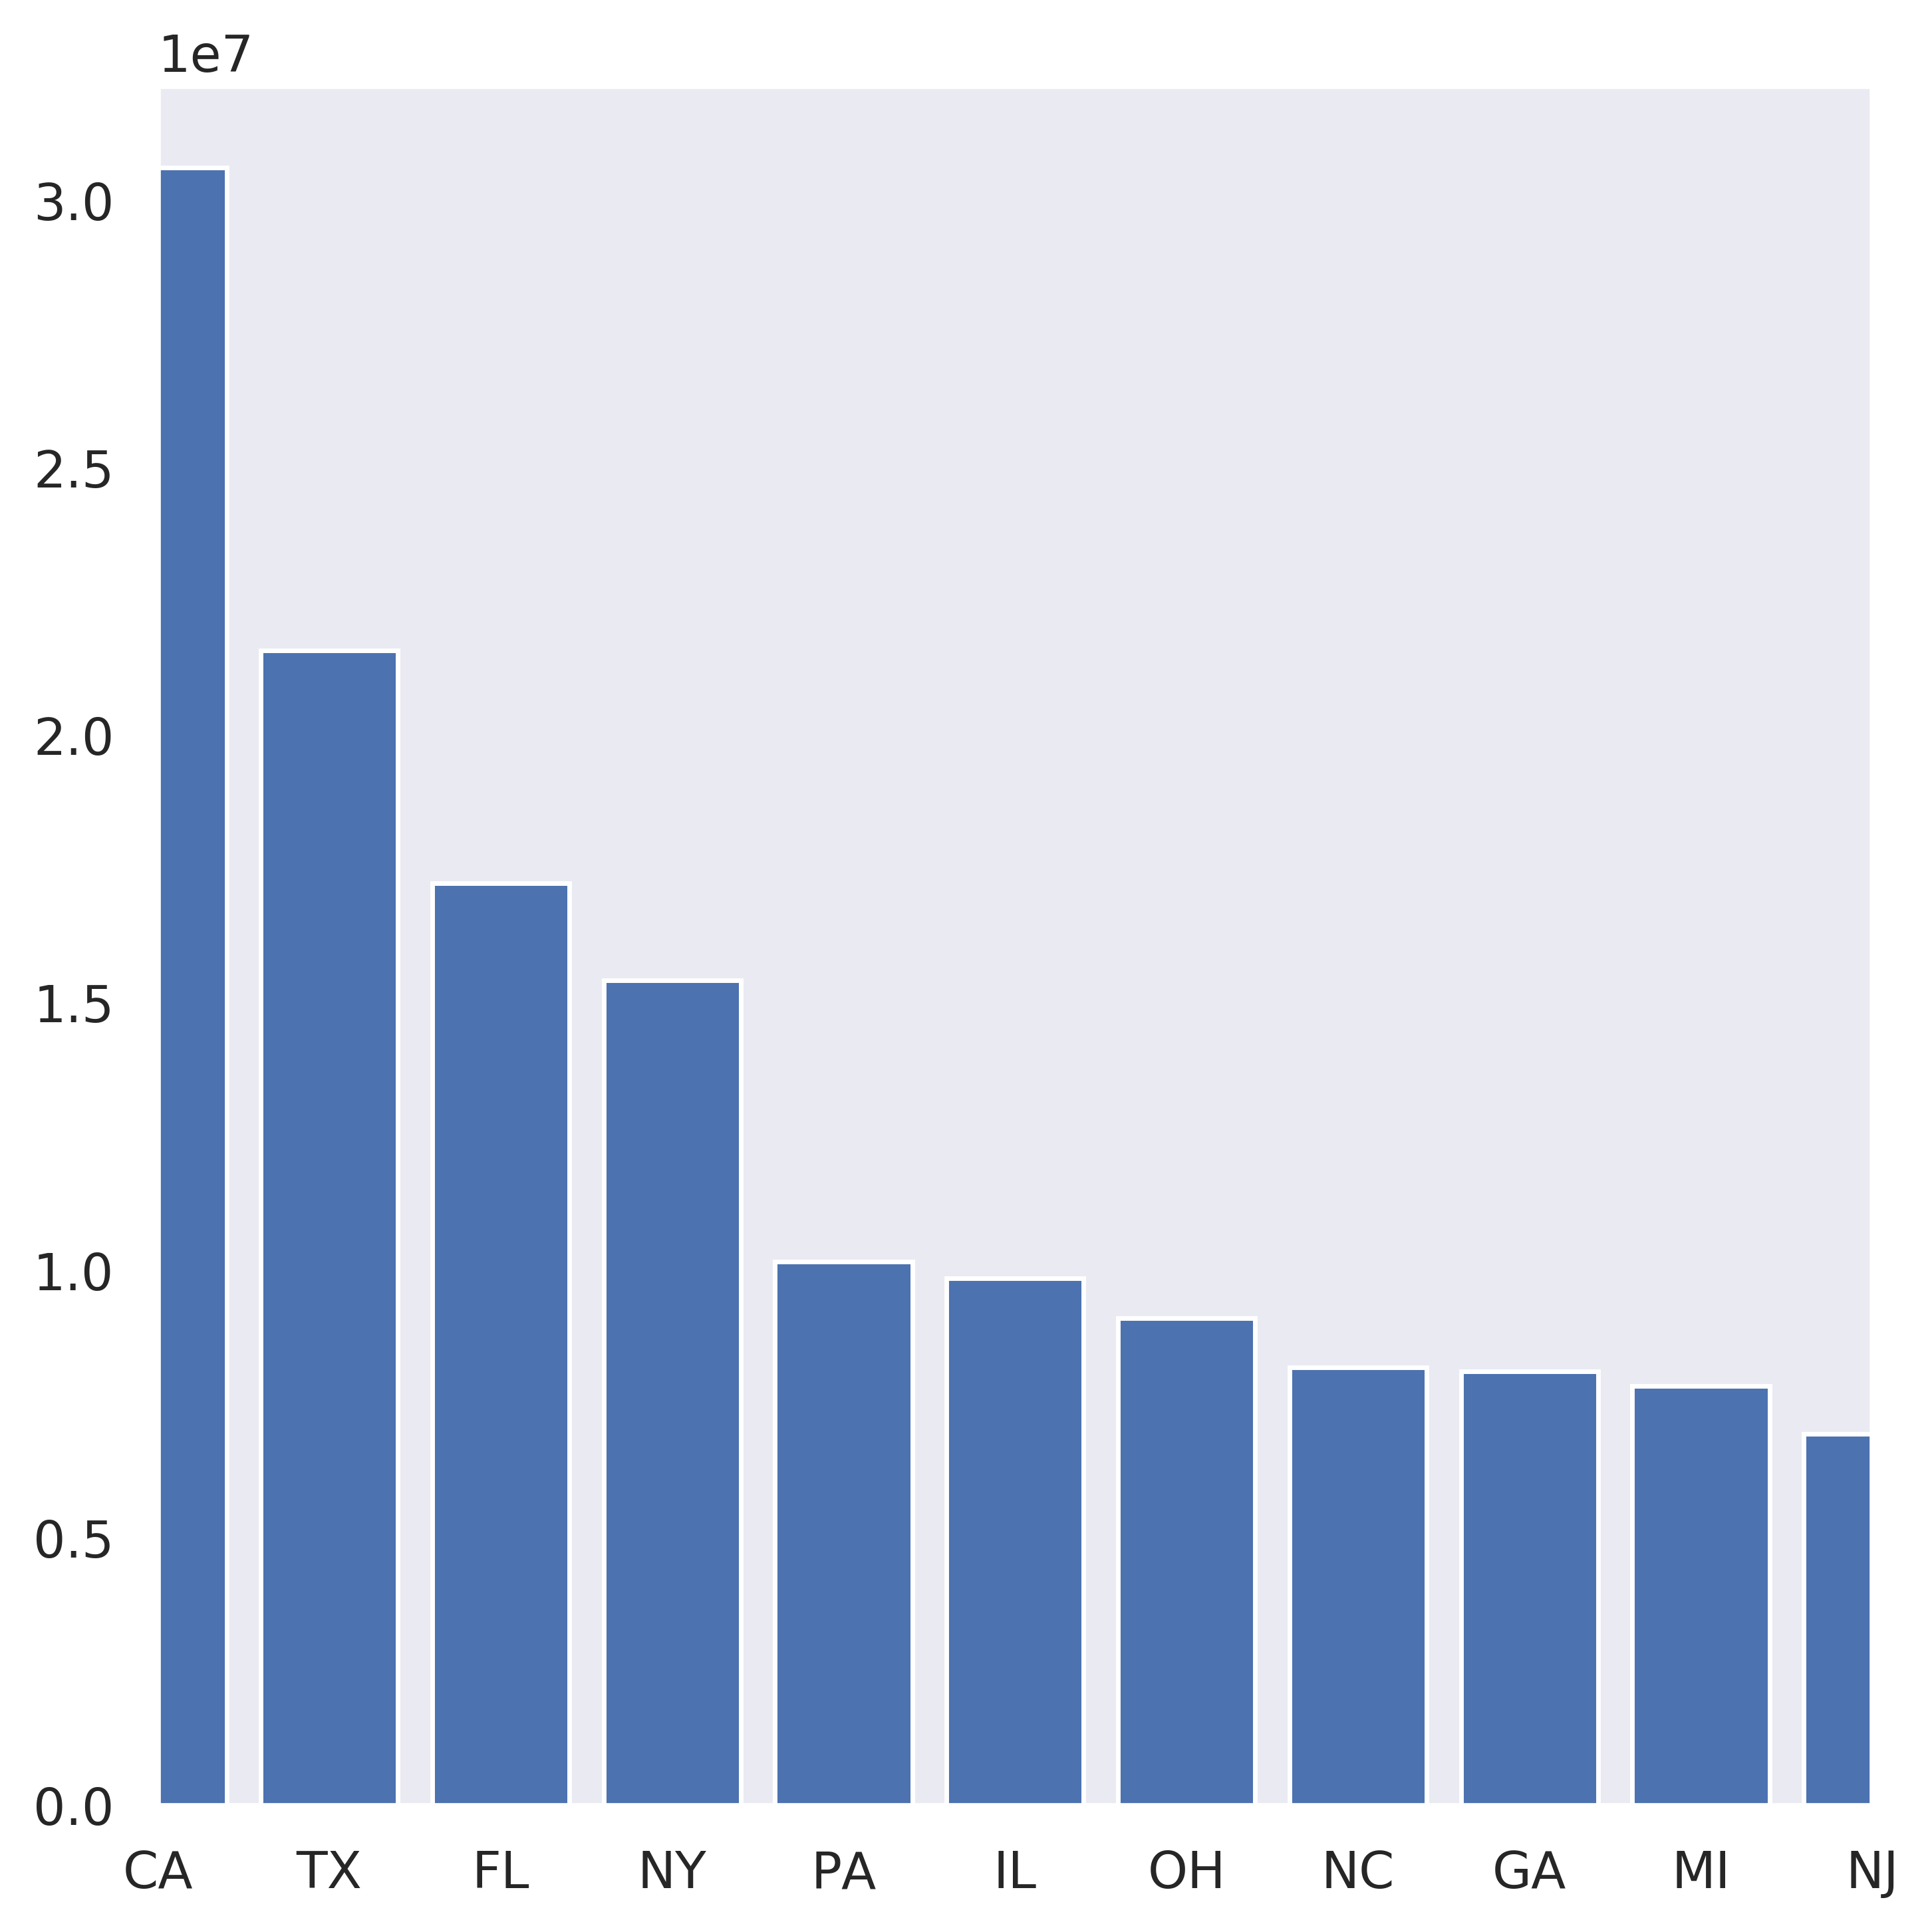

In [118]:
fig, ax = plt.subplots(figsize=(6,6),dpi=500)
ax.bar(state_list,pop_list, width=0.8)
ax.set_xlim([0,10])
# ax.set_ylim([0,500])
ax.grid(False)
plt.tight_layout()

In [13]:
num_unique_County = len(df_test['County'].unique())
num_unique_City = len(df_test['City'].unique())
num_unique_Zip = len(df_test['Zipcode'].unique())

print('# of unique counties:', num_unique_County)
print('# of unique Cities:', num_unique_City)
print('# of unique Zipcodes:', num_unique_Zip)

# of unique counties: 1713
# of unique Cities: 11686
# of unique Zipcodes: 377153


unique Counties:    1,713

unique City Names: 11,686

unique Zipcodes:  377,153

In [15]:
# sorted time_list is a hour:minute list of all accidents
time_list = []
for i in df_test['Start_Time']:
    time_list.append(i[-8:-3])
(time_list).sort()
time_list[:7]

['00:00', '00:00', '00:00', '00:00', '00:00', '00:00', '00:00']

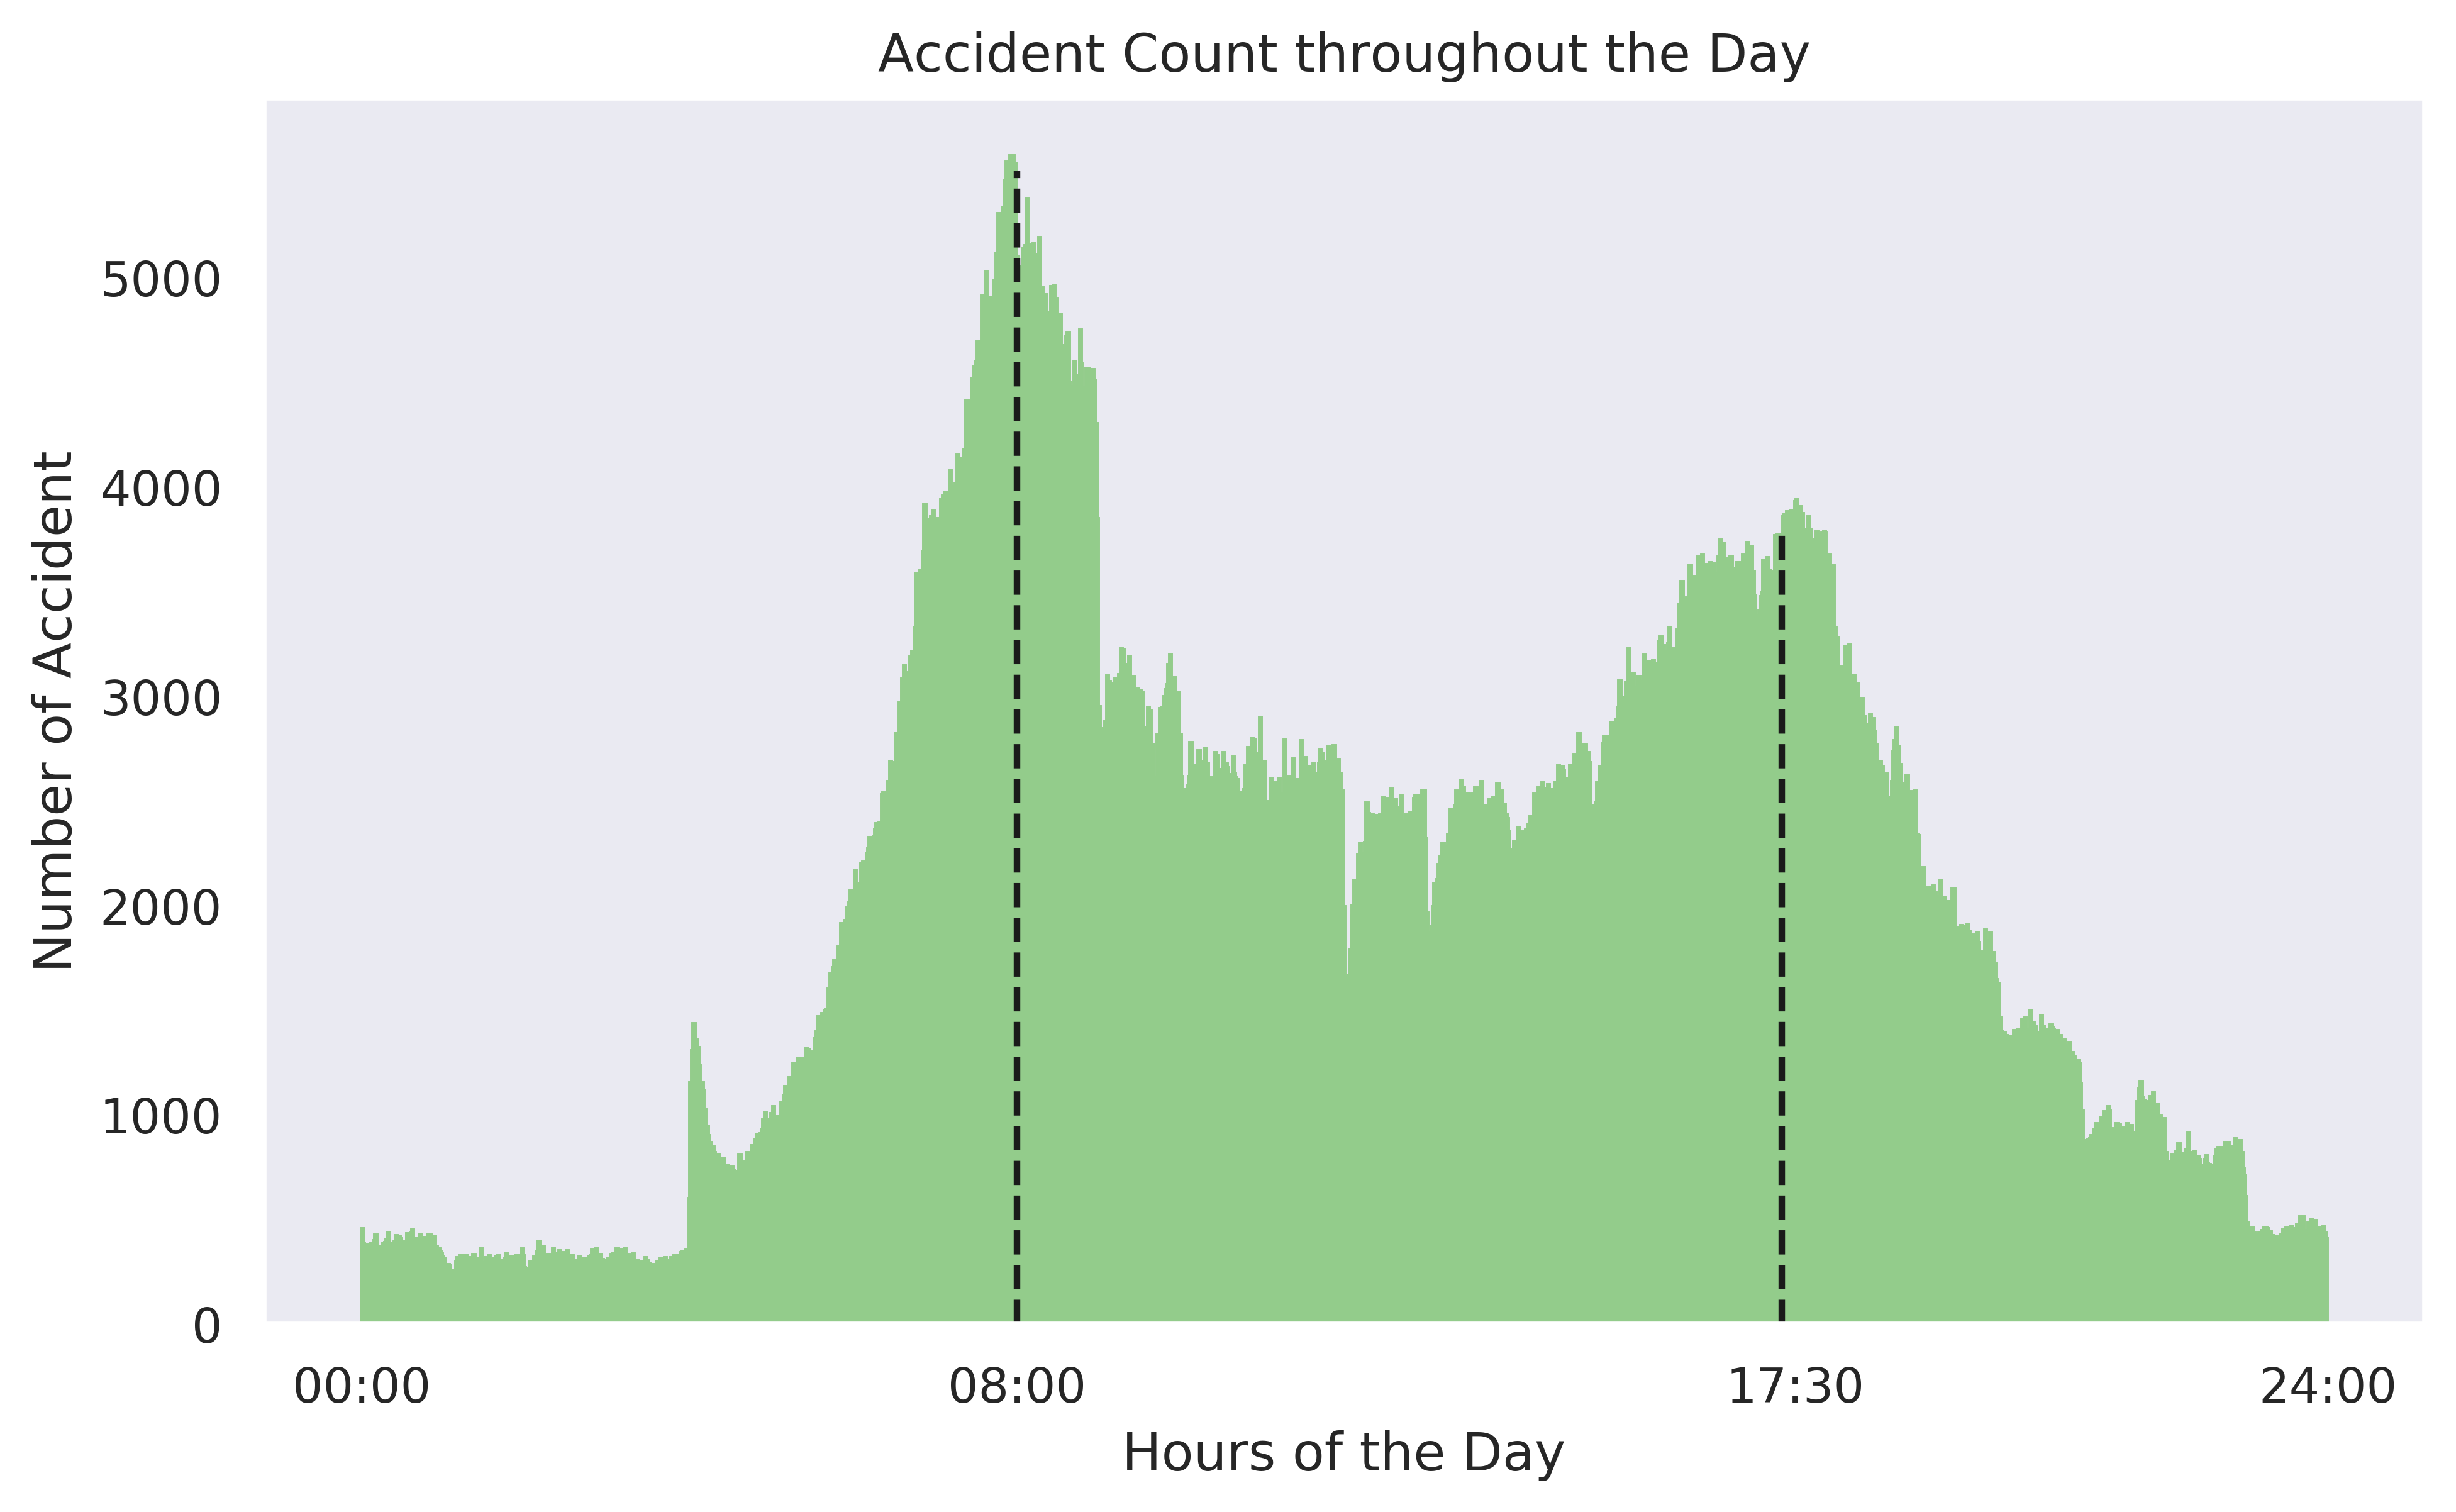

In [18]:
fig, ax = plt.subplots(figsize=(8,5),dpi=500)
ax.hist(time_list, bins=2400, color='b', edgecolor='#93cc8b')

# ax.set_xlim([0,20])
# ax.set_ylim([0,500])
ax.set_ylabel('Number of Accident')
ax.set_xlabel('Hours of the Day')
ax.set_title('Accident Count throughout the Day')

plt.xticks(['00:00','08:00','17:30','24:00'], rotation='horizontal')
plt.axvline(x= '08:00',ymax=0.94, linewidth=1.5, color='k', linestyle='--')
plt.axvline(x= '17:20',ymax=0.65, linewidth=1.5, color='k', linestyle='--')
ax.grid(False)

plt.tight_layout()
plt.savefig('../img/accident-count-throughout-the-day-3.png', dpi = 400)

In [11]:
# sorted year_list is a year list of all accidents
year_list = []
for i in df_test['Start_Time']:
    year_list.append(i[0:4])
(year_list).sort()
year_list[:7]

['2015', '2016', '2016', '2016', '2016', '2016', '2016']

In [12]:
# sorted month:day_list is a hour:minute list of all accidents
month_day_list = []
for i in df_test['Start_Time']:
    month_day_list.append(i[5:10])
(month_day_list).sort()
month_day_list[:7]

['01-01', '01-01', '01-01', '01-01', '01-01', '01-01', '01-01']

In [14]:
month_day_list_2017 = []
for i in range(len(year_list)):
    if year_list[i] == '2017':
        month_day_list_2017.append(month_day_list[i])
month_day_list_2017[:6]

['03-01', '03-01', '03-01', '03-01', '03-01', '03-01']

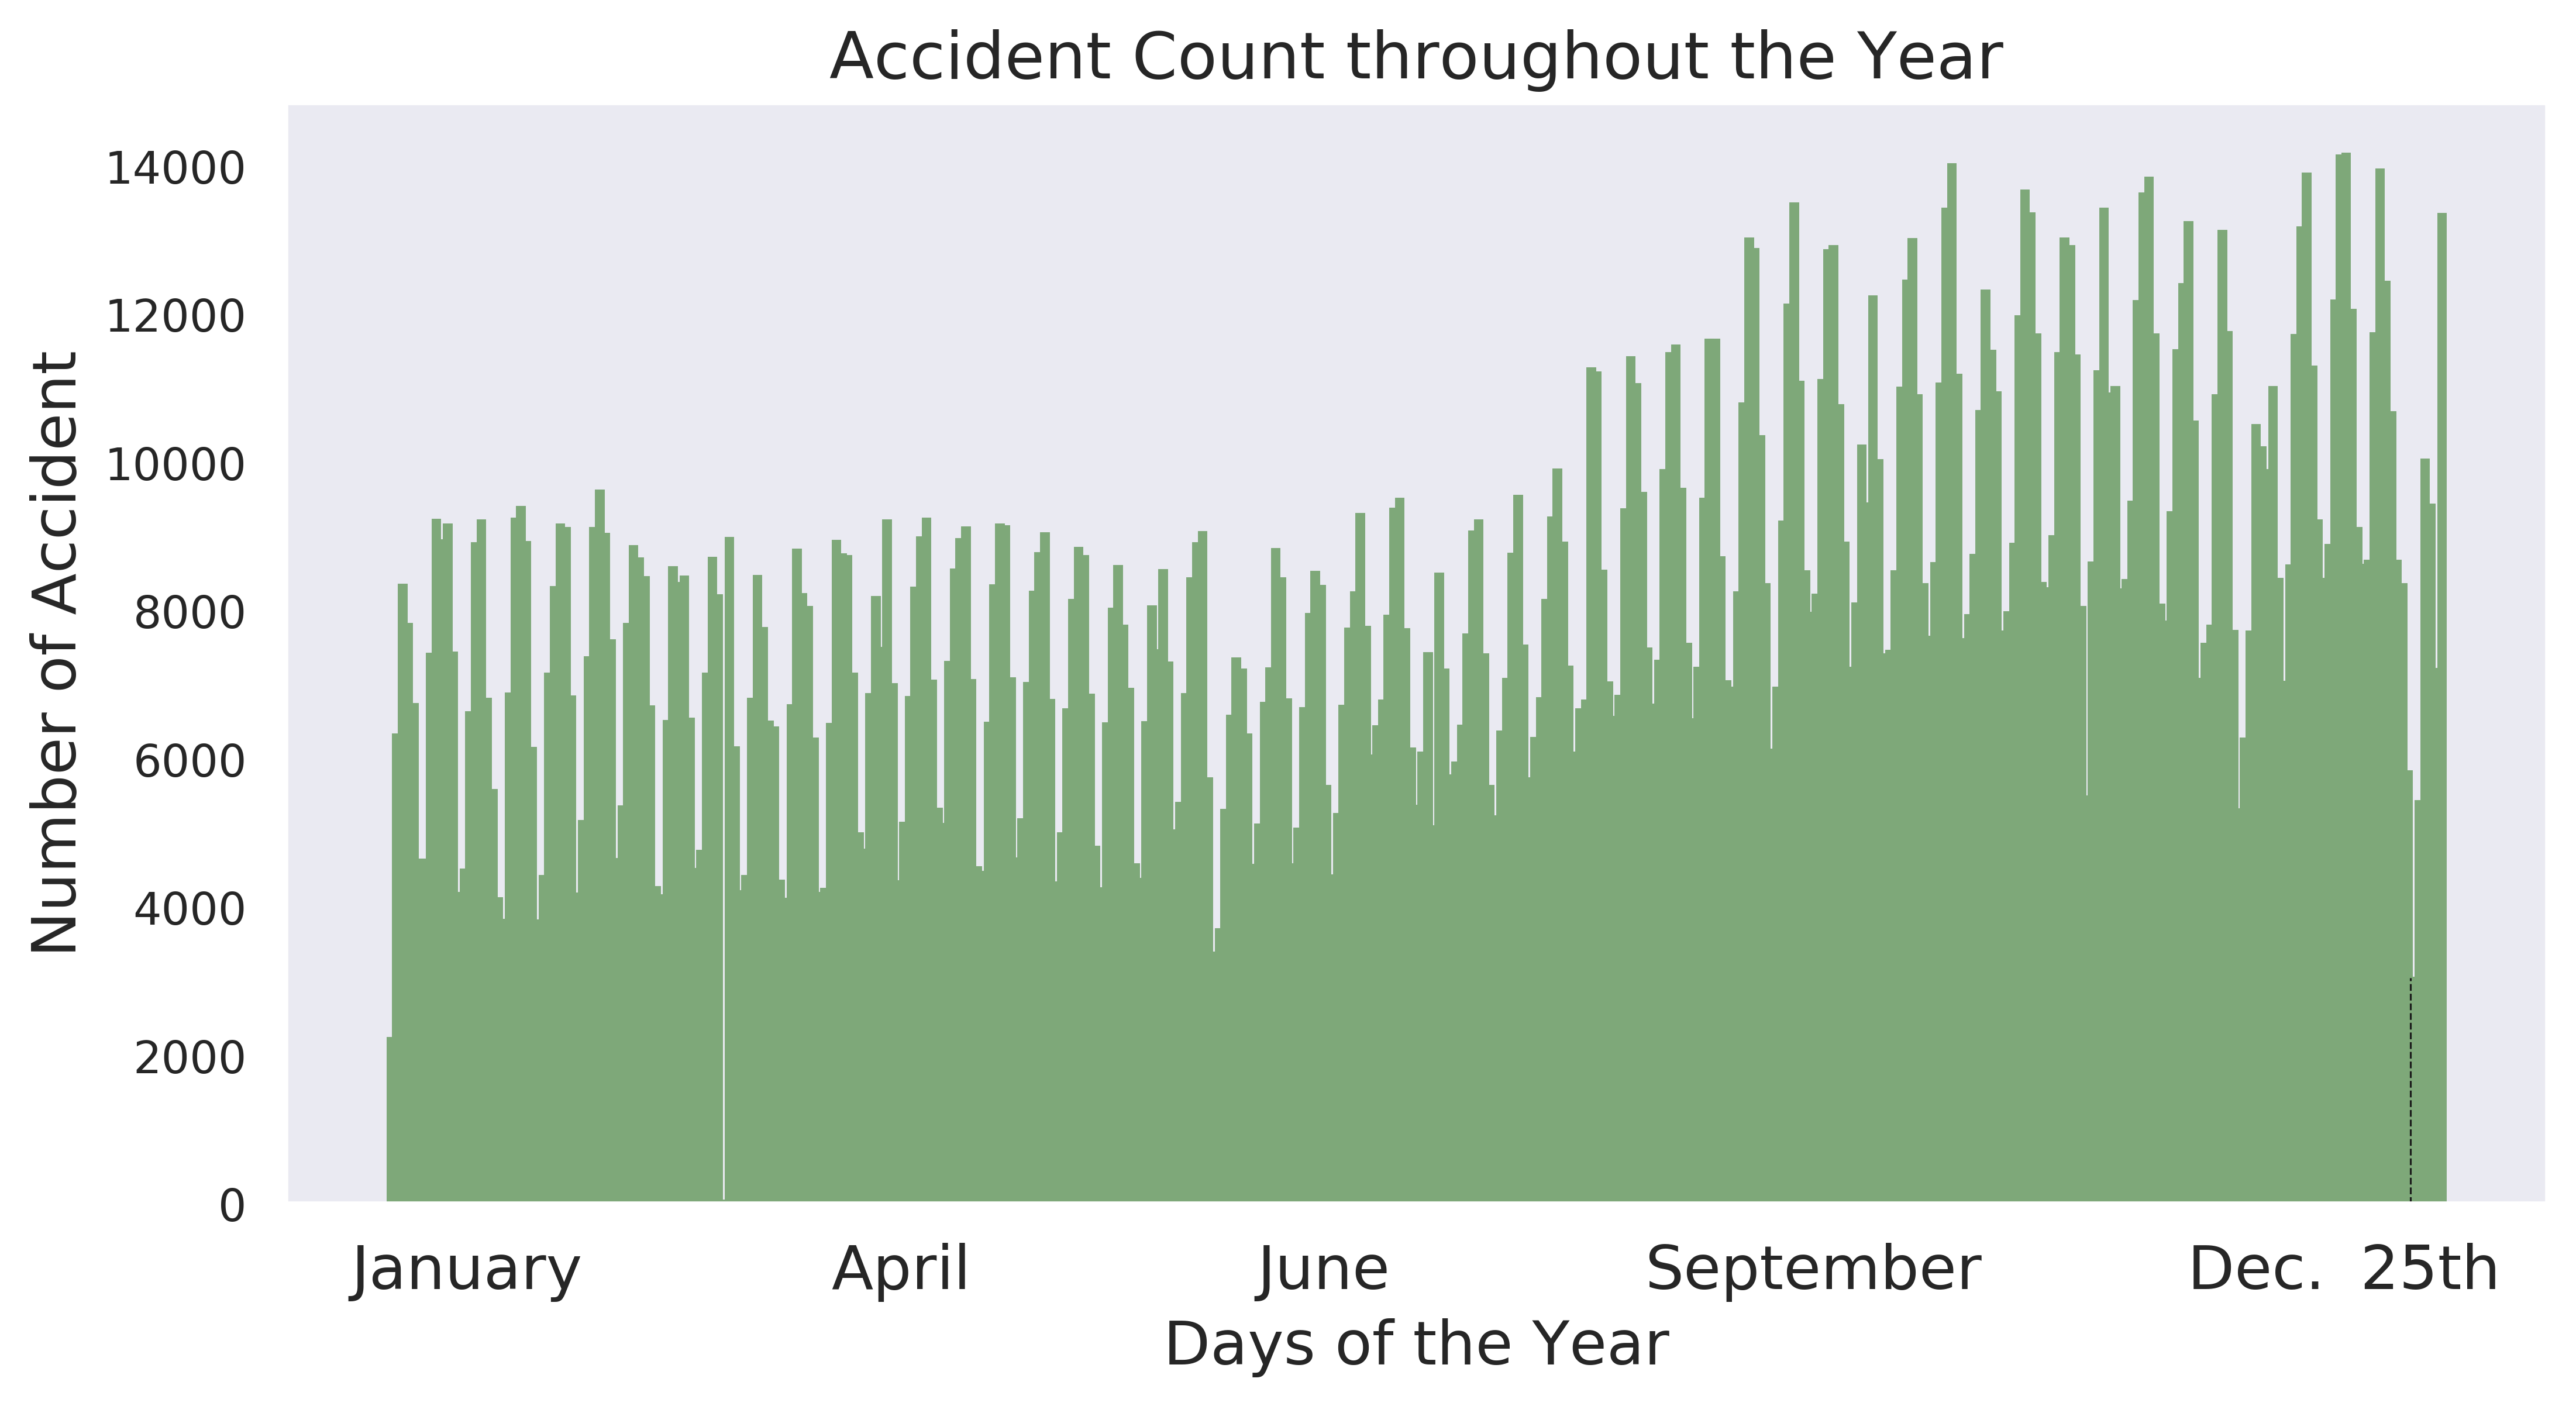

In [151]:
fig, ax = plt.subplots(figsize=(9,5),dpi=500)
color1='#7ea879'
ax.hist(month_day_list, bins=365, color=color1, edgecolor=color1)

# ax.set_xlim([0,20])
# ax.set_ylim([0,500])
ax.set_ylabel('Number of Accident',fontsize=15)
ax.set_xlabel('Days of the Year',fontsize=15)
ax.set_title('Accident Count throughout the Year',fontsize=16)
ax.grid(False)

plt.axvline(x= '12-25',
            ymax=0.205, 
            linewidth=0.45, 
            color='k', 
            linestyle='--')

plt.xticks(('01-15', '04-01', '06-15', '09-10', '12-01', '12-25'),
           ('January', 'April','June','September','Dec.  ','  25th'),
           rotation=0,
           fontsize=15
          )

plt.tight_layout()
plt.savefig('../img/accident-count-throughout-the-year.png', dpi = 400)

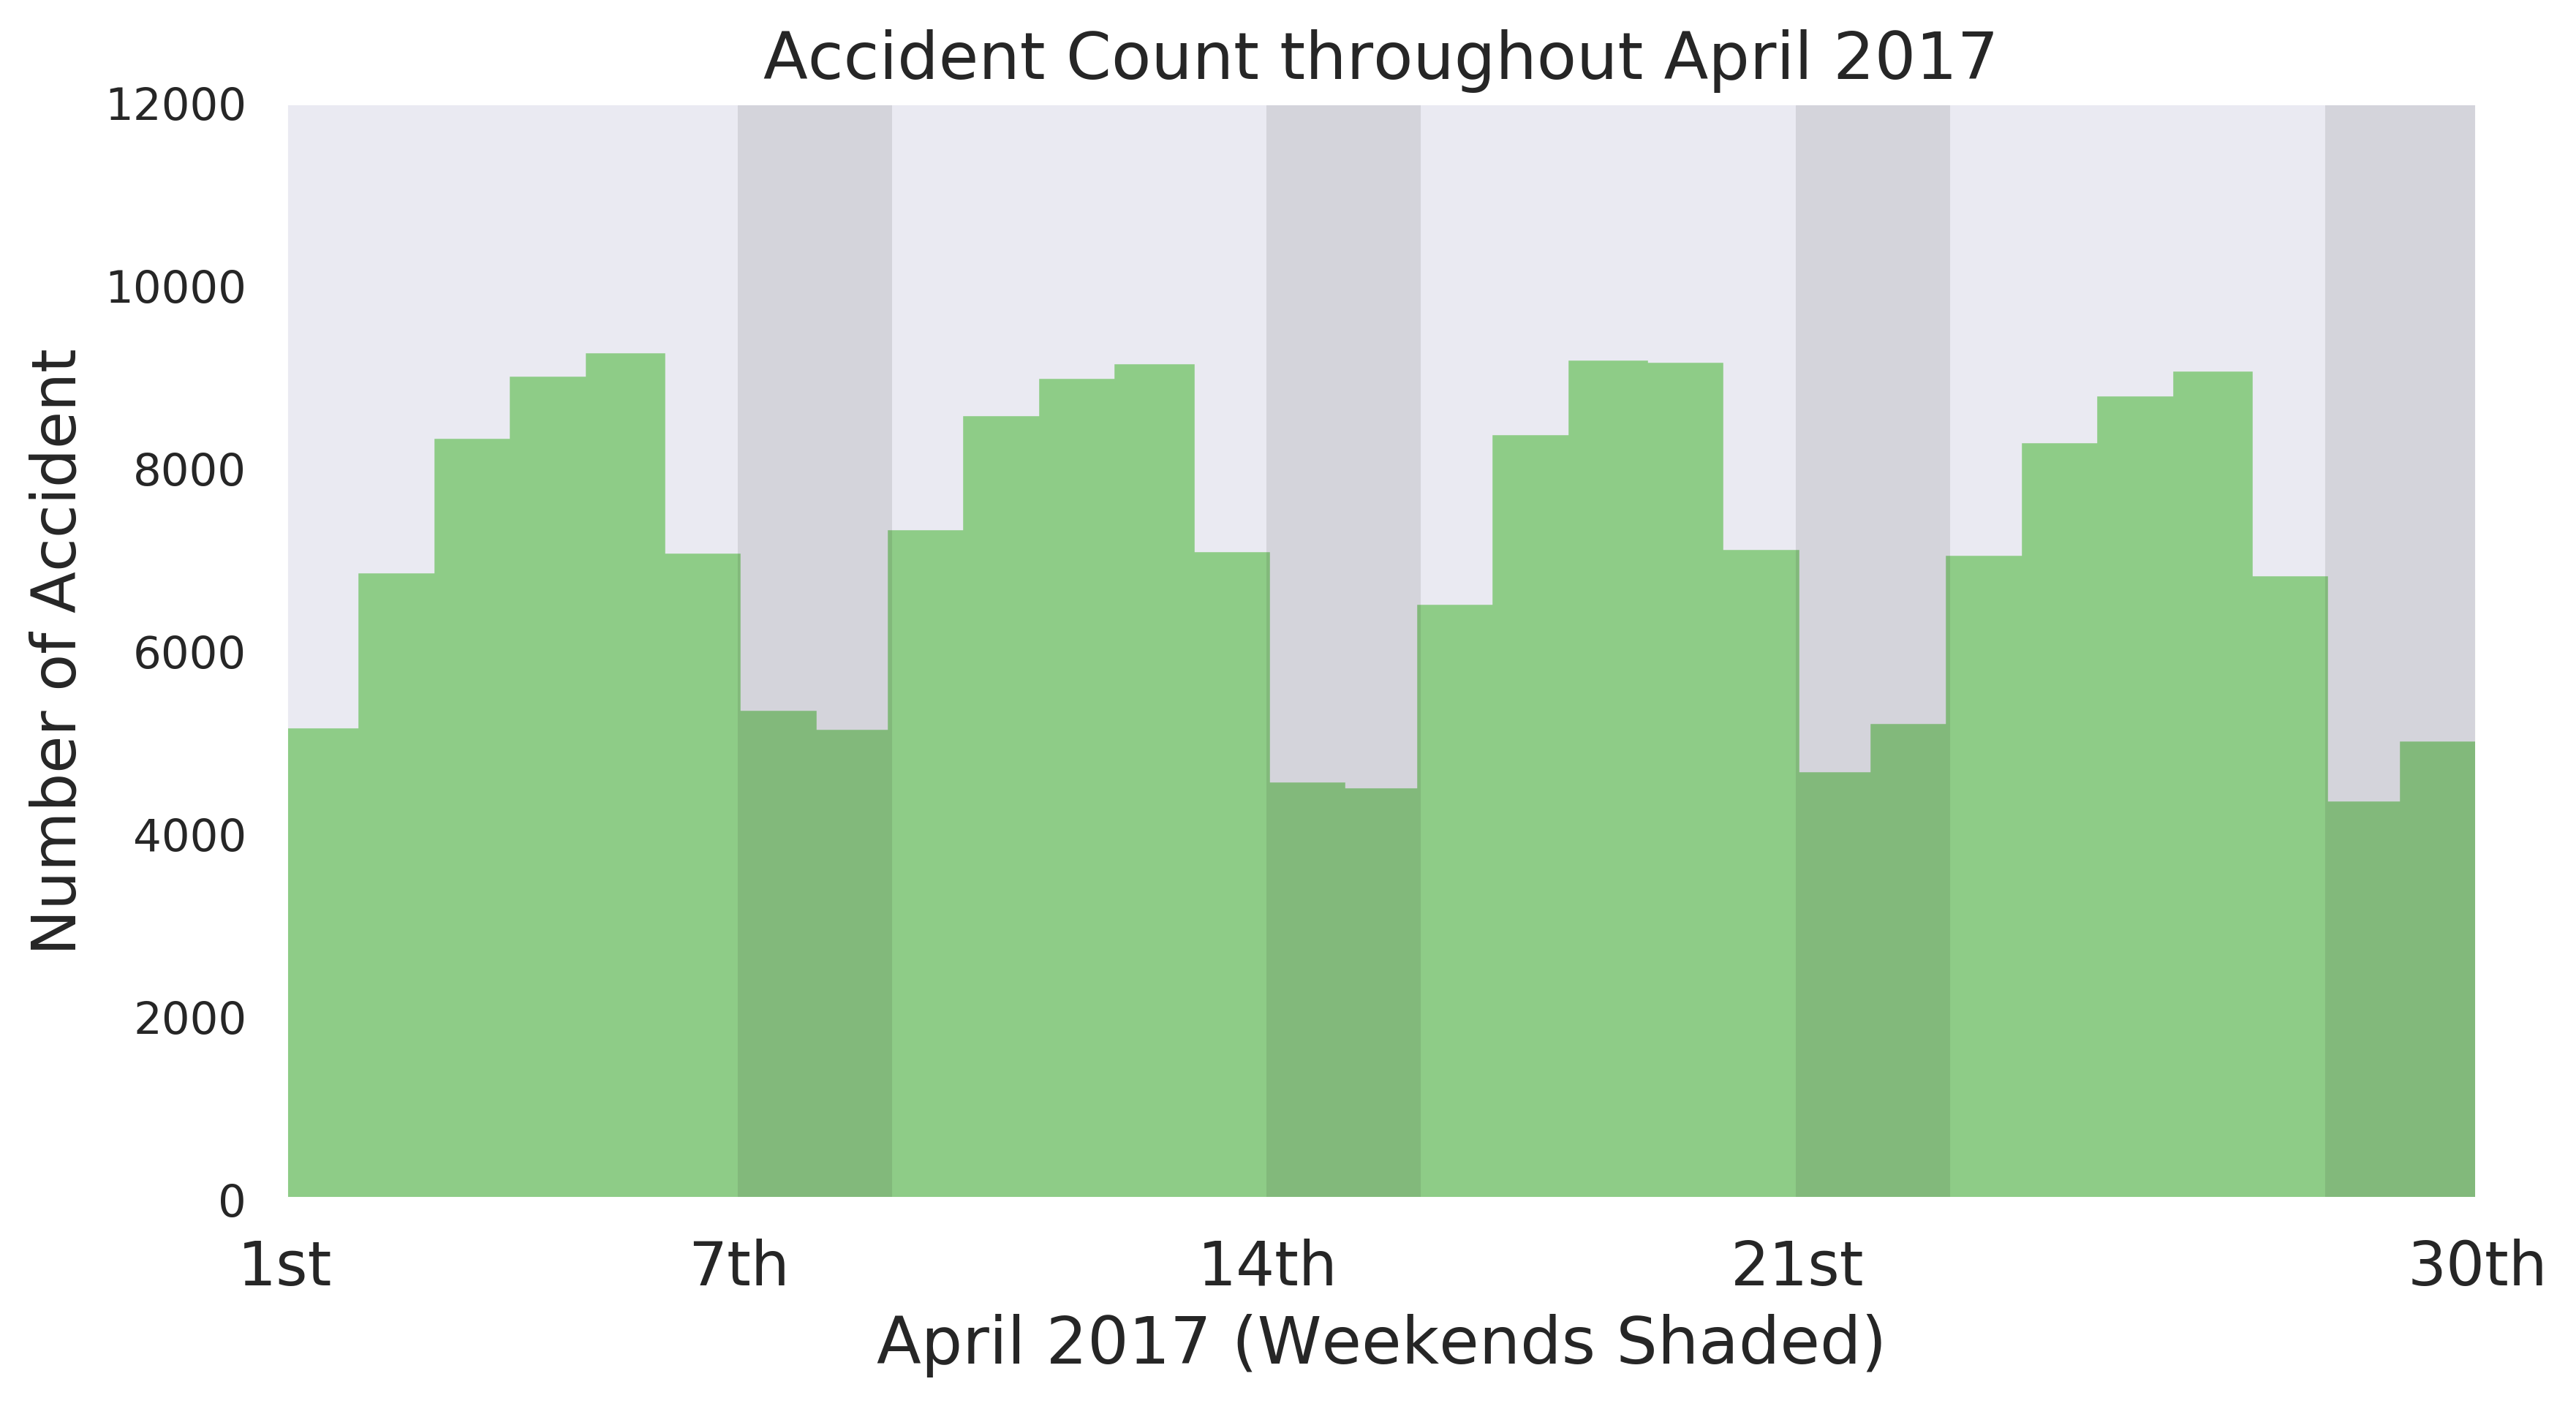

In [146]:
fig, ax = plt.subplots(figsize=(9,5),dpi=400)
color1='#8ecc87'
ax.hist(month_day_list, bins=365, color=color1, edgecolor=color1)

ax.set_xlim(xmin='04-01',xmax='04-30')
ax.set_ylim([0,12000])
ax.set_ylabel('Number of Accident',fontsize=15)
ax.set_xlabel('April 2017 (Weekends Shaded)',fontsize=16)
ax.set_title('Accident Count throughout April 2017',fontsize=16)
ax.grid(False)

for weekend in ['04-08','04-15','04-22','04-29']:
    plt.axvline(x= weekend,
                ymax=1, 
                linewidth=38, 
                color='k',
                alpha=0.1
               )

plt.xticks(('04-01','04-07','04-14','04-21','04-30'),
           ('1st', '7th','14th','21st','30th'),
           rotation=0,
           fontsize=15
          )

plt.tight_layout()
plt.savefig('../img/accident-count-throughout-april.png', dpi = 400)

In [114]:
# sorted month:day_list is a hour:minute list of all accidents
month_list = []
day_list = []
for i in df_test['Start_Time']:
    month_list.append(i[5:7])
(month_list).sort()

for i in df_test['Start_Time']:
    day_list.append(i[8:10])
(day_list).sort()
print(year_list[5000])

2016


In [136]:
day_list_2018_dec_list = []
for i in range(len(month_list)):
        if month_list[i] == '12':
            day_list_2018_dec_list.append(day_list[i])
day_list_2018_dec_list[:8]

['28', '28', '28', '28', '28', '28', '28', '28']

In [ ]:
fig, ax = plt.subplots(figsize=(5,5),dpi=500)
ax.hist(month_day_list, bins=365, color='r', edgecolor='darkorange')

# ax.set_xlim([0,20])
# ax.set_ylim([0,500])
ax.set_ylabel('Number of Accident')
ax.set_xlabel('Days of the Year')
ax.set_title('Accident Count throughout the Day')
ax.grid(False)


plt.xticks(rotation='vertical')

plt.tight_layout()
plt.savefig('../img/accident-count-throughout-the-year.png', dpi = 300)fig, ax = plt.subplots(figsize=(5,5),dpi=500)
ax.hist(month_day_list, bins=365, color='r', edgecolor='darkorange')

# ax.set_xlim([0,20])
# ax.set_ylim([0,500])
ax.set_ylabel('Number of Accident')
ax.set_xlabel('Days of the Year')
ax.set_title('Accident Count throughout the Day')
ax.grid(False)


plt.xticks(rotation='vertical')

plt.tight_layout()
plt.savefig('../img/accident-count-throughout-the-year.png', dpi = 300)

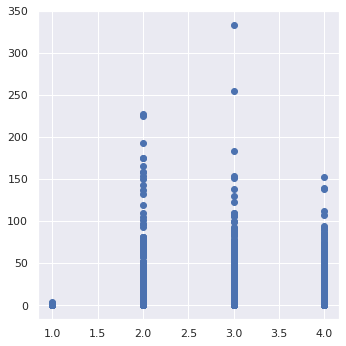

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df_test['Severity'],df_test['Distance(mi)'])


# ax.set_xlim([-1000,50000])
# ax.set_ylim([-100,5000])
# ax.set_ylabel('Number of Retweets')
# ax.set_xlabel('Number of Friends')
# ax.set_title('Retweets vs. Friends')
plt.tight_layout()
# plt.savefig('.png', dpi = 400)

Severity vs Distance

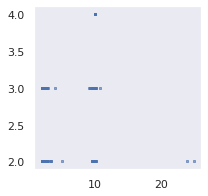

In [15]:
fig, ax = plt.subplots(figsize=(3,3))
precip_cutoff = 2
high_rain = df_test[df_test['Precipitation(in)'] > precip_cutoff]
low_rain = df_test[df_test['Precipitation(in)'] <= precip_cutoff]
ax.scatter(high_rain['Precipitation(in)'],high_rain['Severity'],c='b', marker=',',alpha=0.6,s=5)
# ax.set_xlim([-127.7, -111.15])
# ax.set_ylim([31.46,43.2])
# ax.set_ylabel('Latitude')
# ax.set_xlabel('Longitude')
# ax.set_title('Accident Map')
ax.grid(False)

Not much relation in precipitation vs severity

Severity kinda suck (1 - 4 not a lot of info)

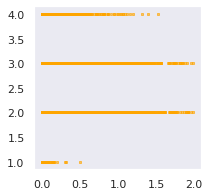

In [16]:
fig, ax = plt.subplots(figsize=(3,3))
precip_cutoff = 2
ax.scatter(low_rain['Precipitation(in)'],low_rain['Severity'],c='orange', marker=',',alpha=0.6,s=5)
ax.grid(False)

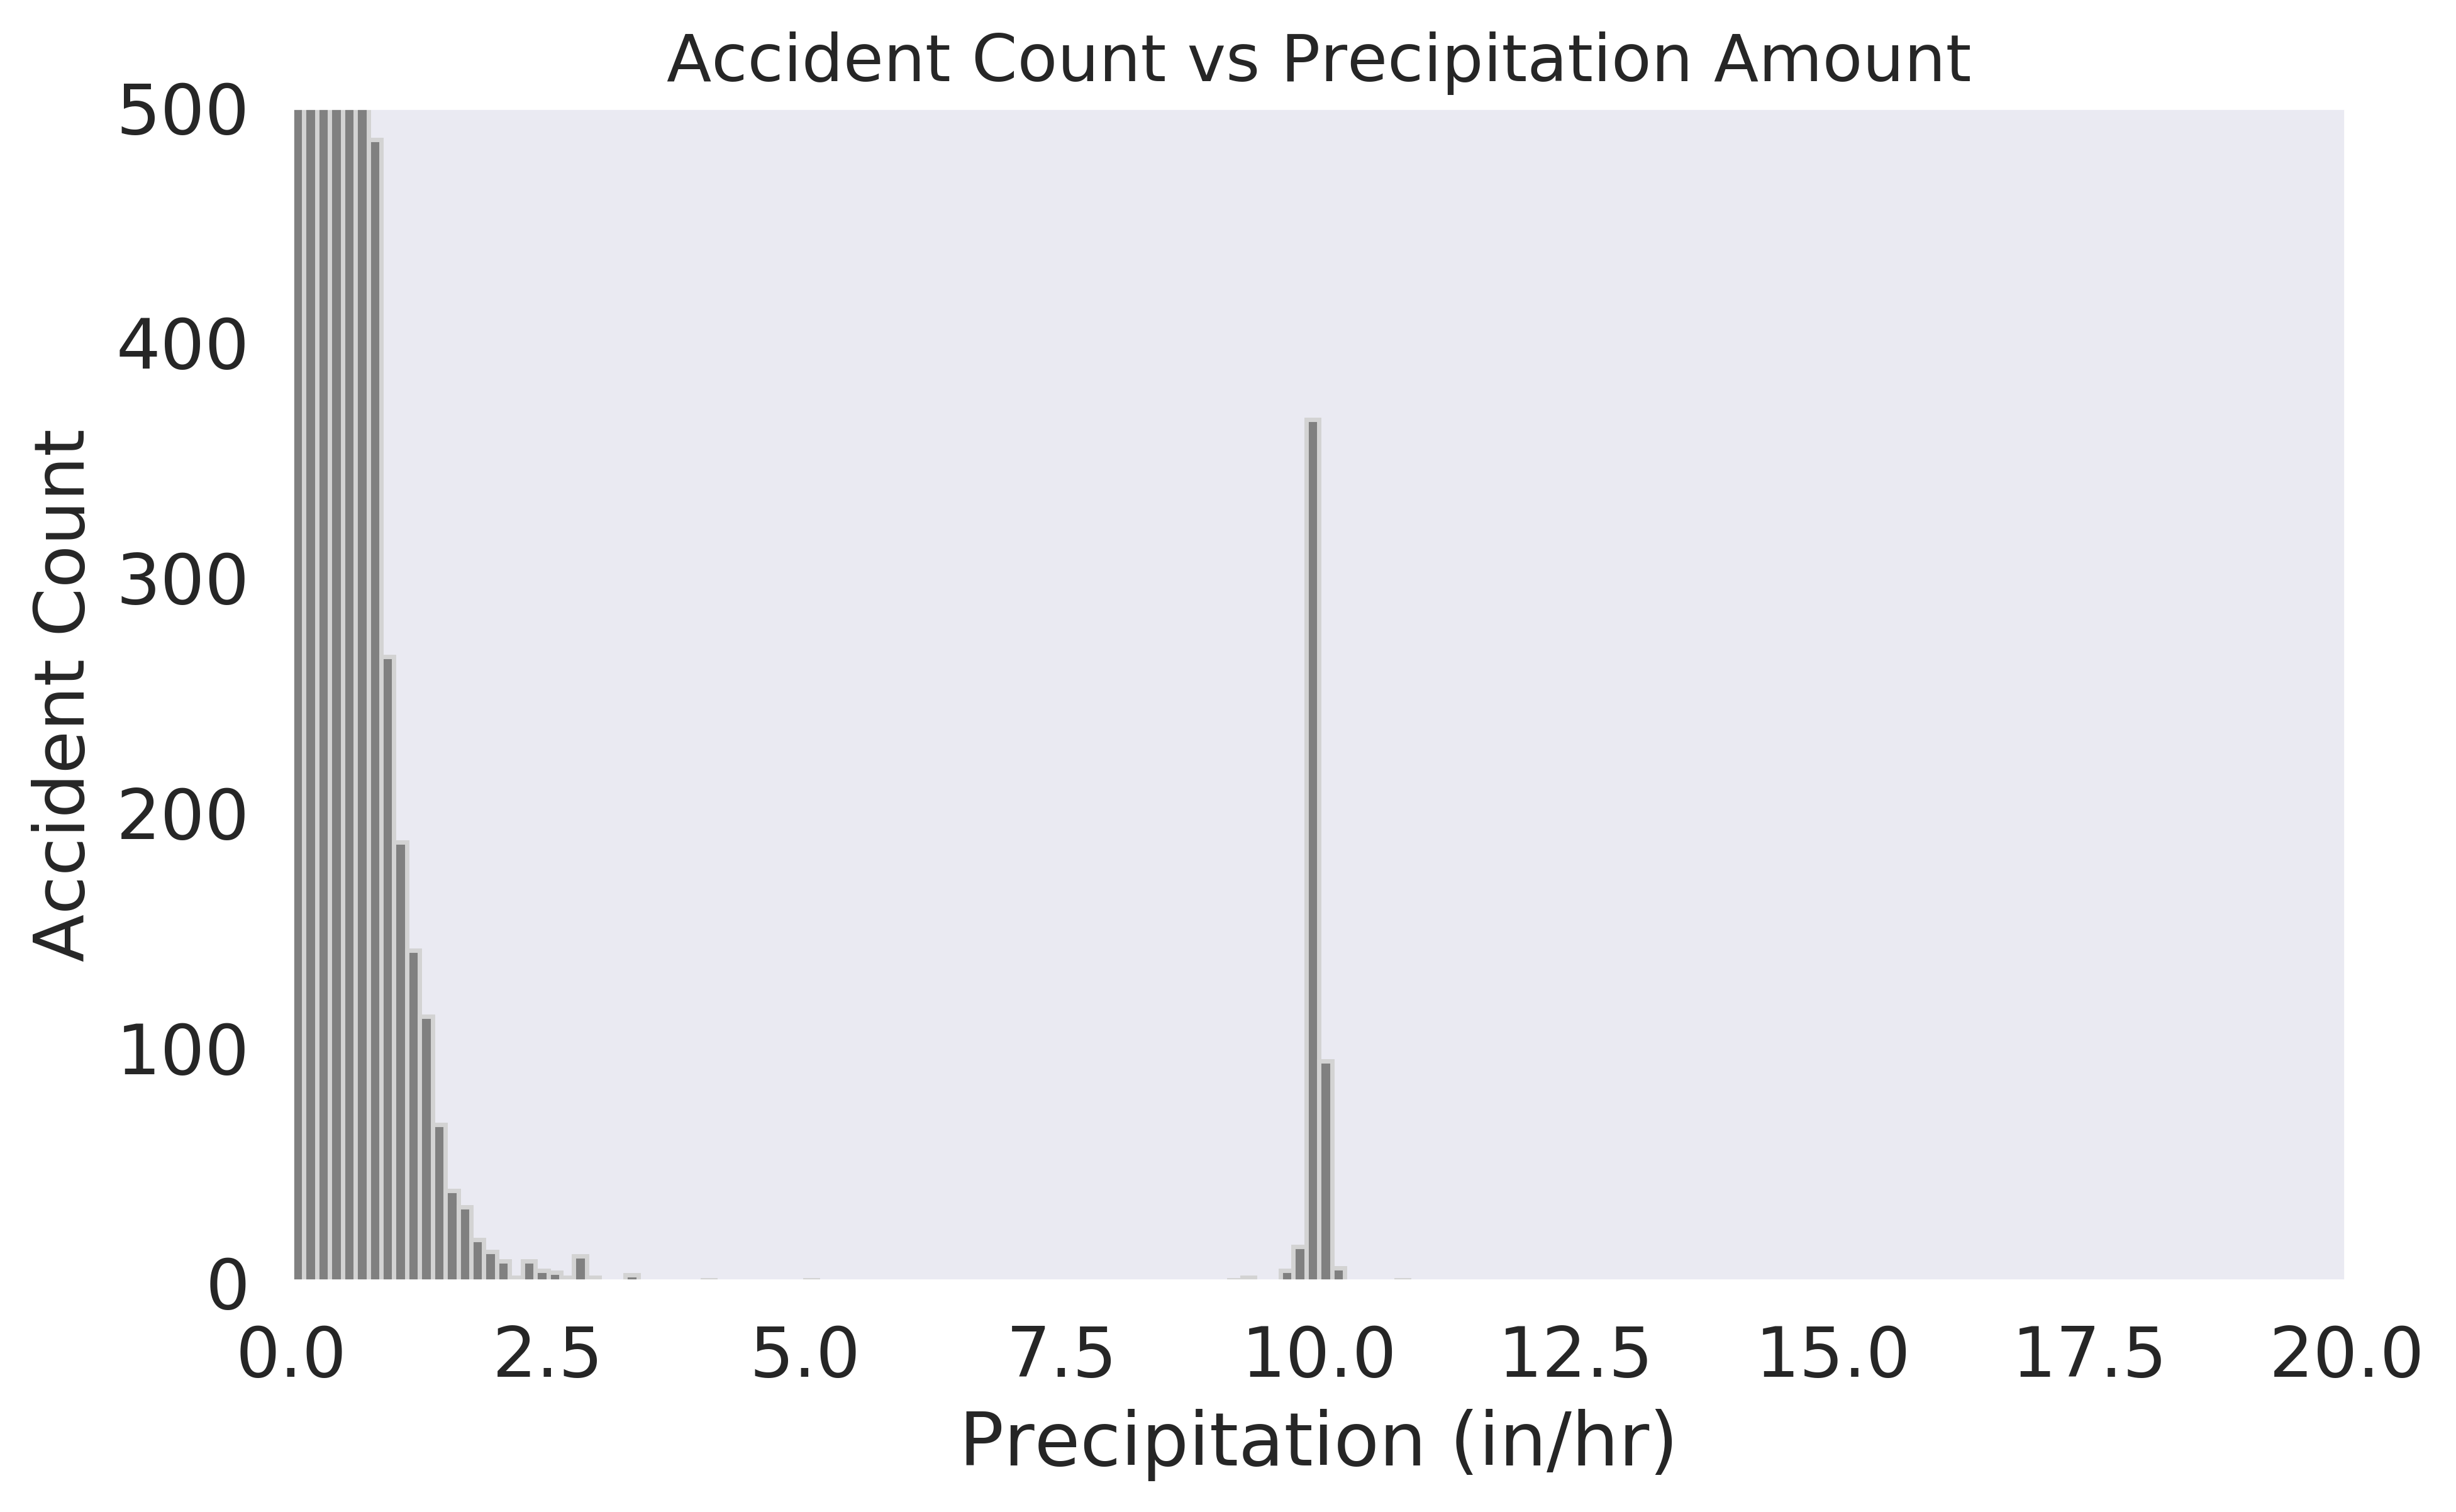

In [144]:
fig, ax = plt.subplots(figsize=(8,5),dpi=500)
ax.hist(df_test['Precipitation(in)'].dropna(), bins=200, edgecolor='lightgrey',color='grey')
ax.set_xlim([0,20])
ax.set_ylim([0,500])
ax.set_title('Accident Count vs Precipitation Amount',fontsize=15)
ax.set_ylabel('Accident Count',fontsize=16)
ax.set_xlabel('Precipitation (in/hr)',fontsize=17)
ax.grid(False)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('../img/precip_counts')

Spike in Accident rate @ 10 in/hr of Precipitation

Likely because its a nice round number

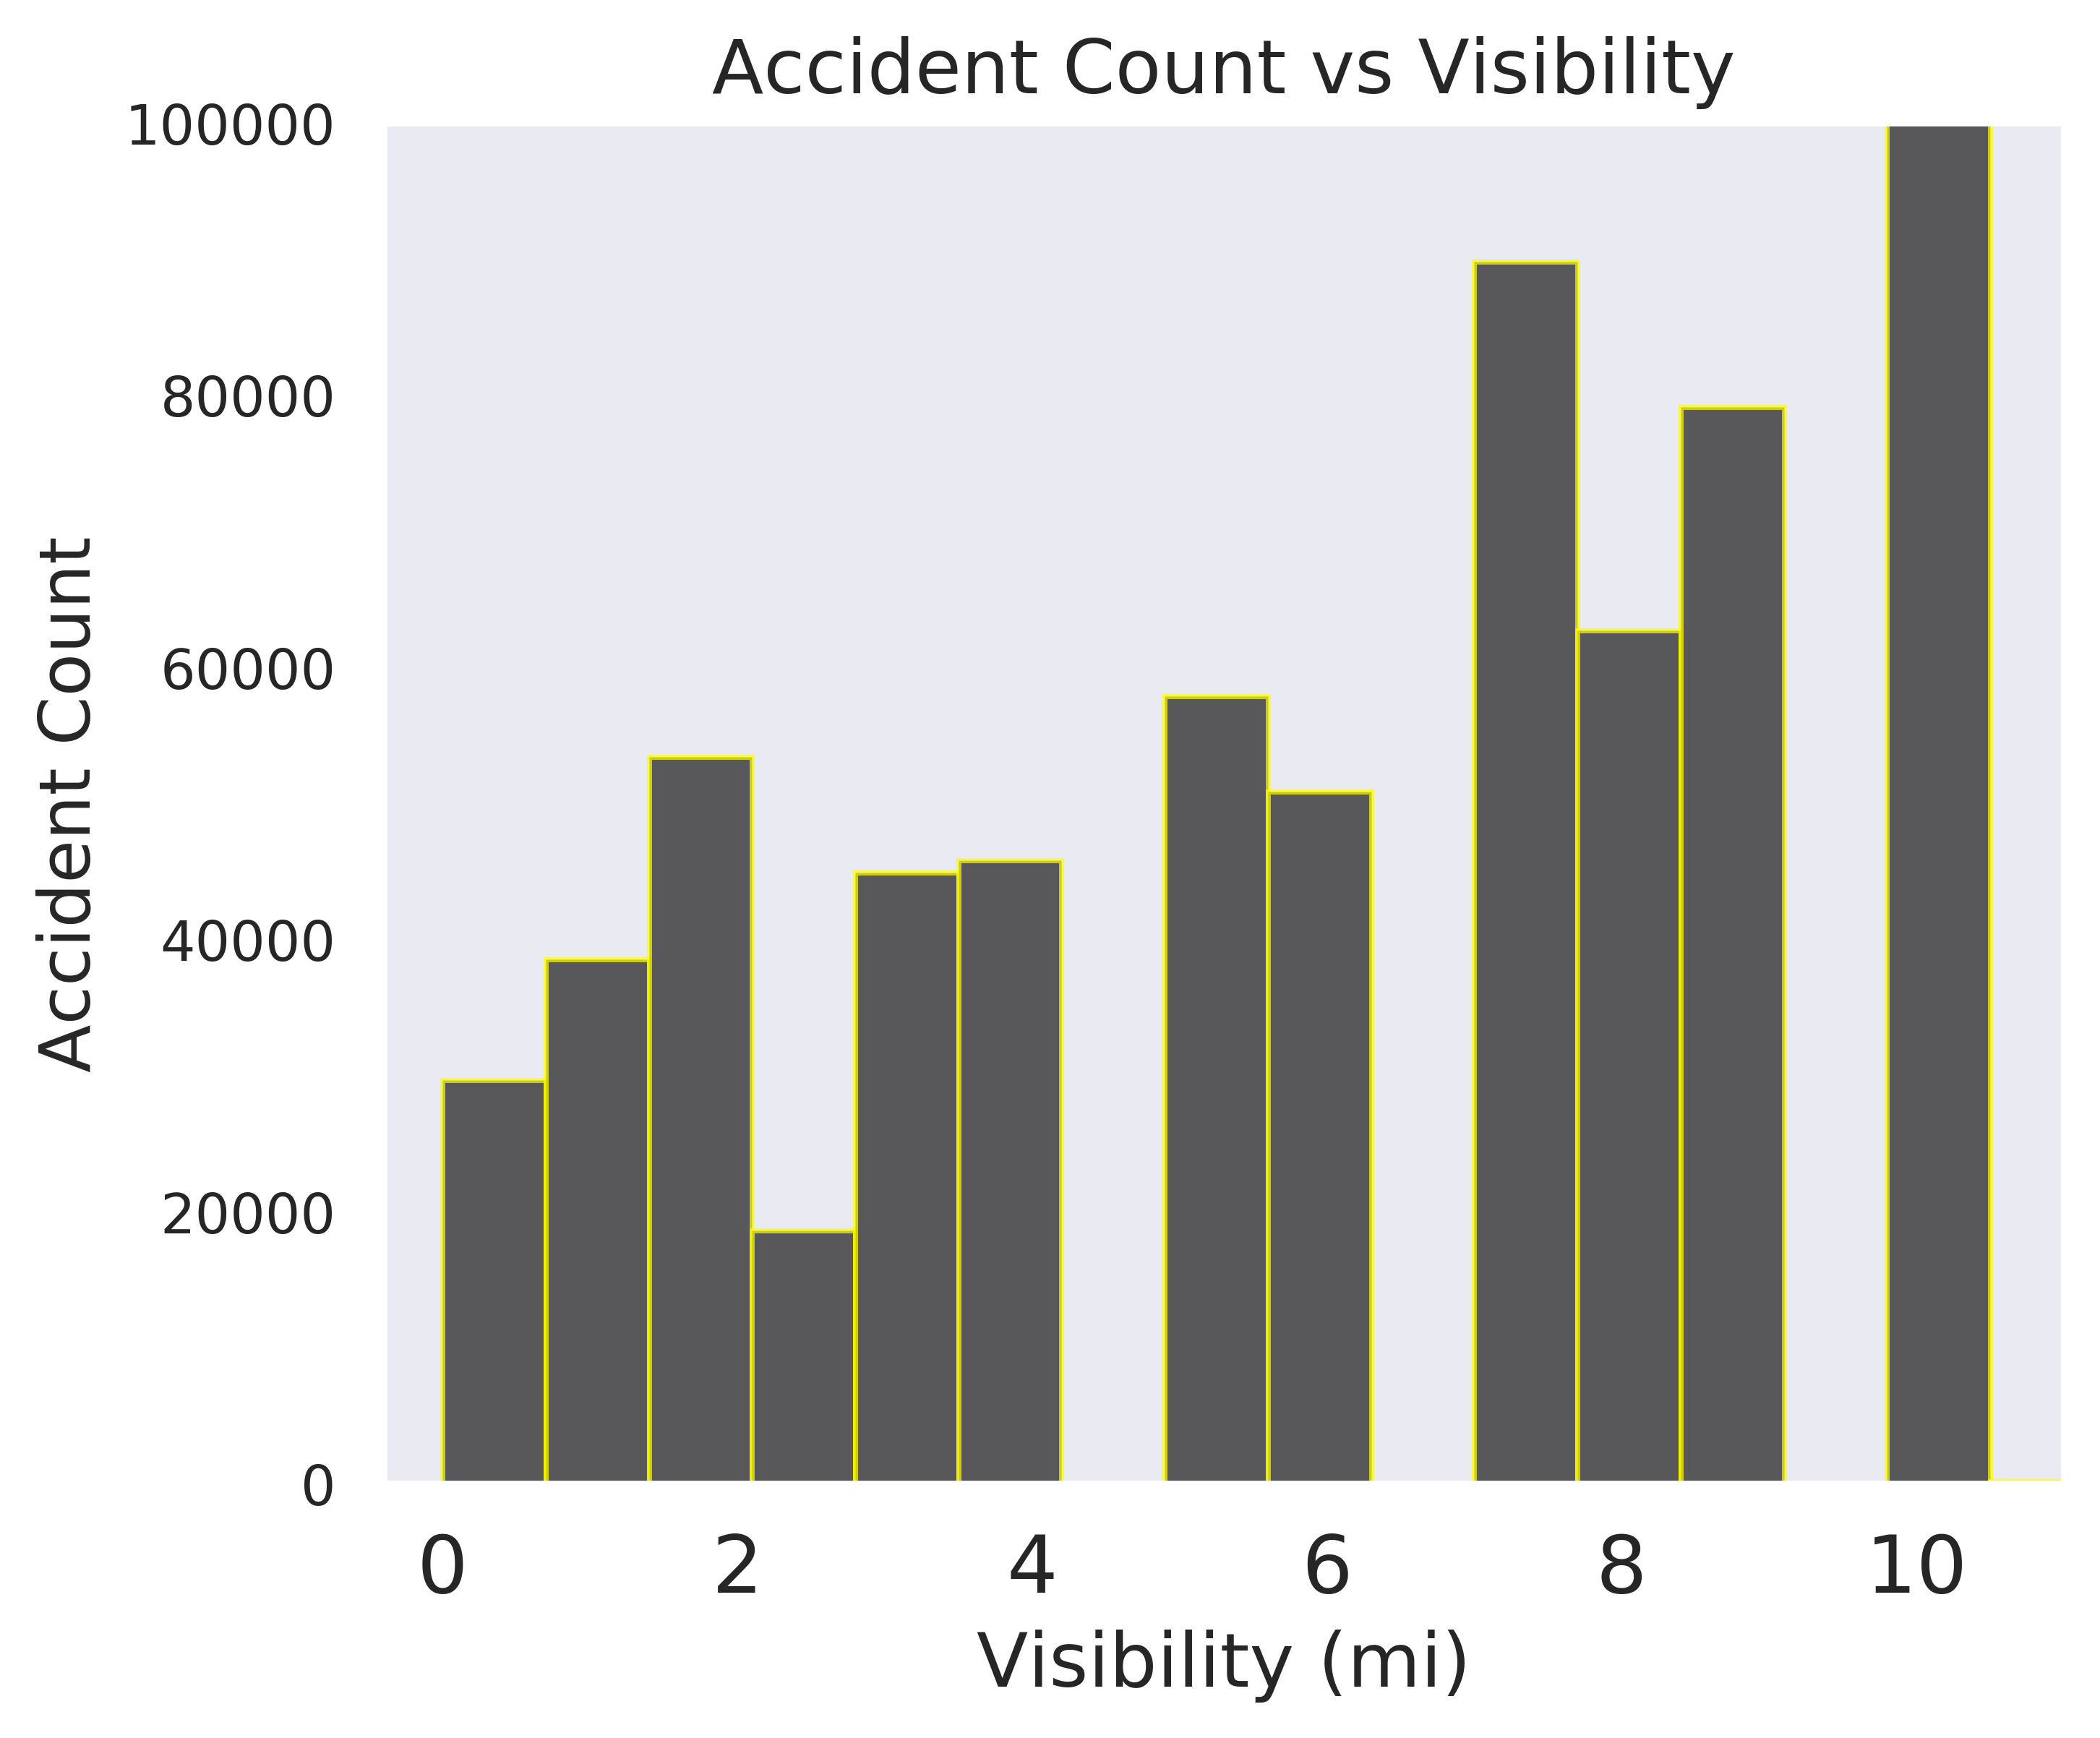

In [143]:
fig, ax = plt.subplots(figsize=(6,5),dpi=500)
ax.hist(df_test['Visibility(mi)'].dropna(), bins=200,edgecolor='yellow',color='k', alpha=0.7)
ax.set_xlim([-0.4,11])
ax.set_ylim([0,100000])
ax.set_title('Accident Count vs Visibility',fontsize=15)
ax.set_ylabel('Accident Count',fontsize=14)
ax.set_xlabel('Visibility (mi)',fontsize=15)
ax.grid(False)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig('../img/visibility_counts.png')

In [101]:
# sorted time_list is a hour:minute list of all accidents
weather_condition_list = []
weather_condition_dict = {}
for condition in df_test['Weather_Condition']:
    weather_condition_list.append(condition)

weather_condition_dict = Counter(weather_condition_list)
weather_condition_dict

Counter({'Light Rain': 141073,
         'Overcast': 382480,
         'Mostly Cloudy': 412528,
         'Rain': 32826,
         'Light Snow': 42123,
         'Haze': 34315,
         'Scattered Clouds': 204662,
         'Partly Cloudy': 295439,
         'Clear': 808171,
         'Snow': 4796,
         'Light Freezing Drizzle': 798,
         'Light Drizzle': 10277,
         'Fog': 22138,
         'Shallow Fog': 1135,
         'Heavy Rain': 12064,
         'Light Freezing Rain': 2132,
         'Cloudy': 115496,
         'Drizzle': 2044,
         nan: 65932,
         'Light Rain Showers': 157,
         'Mist': 2204,
         'Smoke': 3602,
         'Patches of Fog': 2386,
         'Light Freezing Fog': 1001,
         'Light Haze': 10,
         'Light Thunderstorms and Rain': 4928,
         'Thunderstorms and Rain': 2215,
         'Fair': 335289,
         'Volcanic Ash': 22,
         'Blowing Sand': 1,
         'Blowing Dust / Windy': 64,
         'Widespread Dust': 129,
         'Fair / Win

NameError: name 'time_list' is not defined

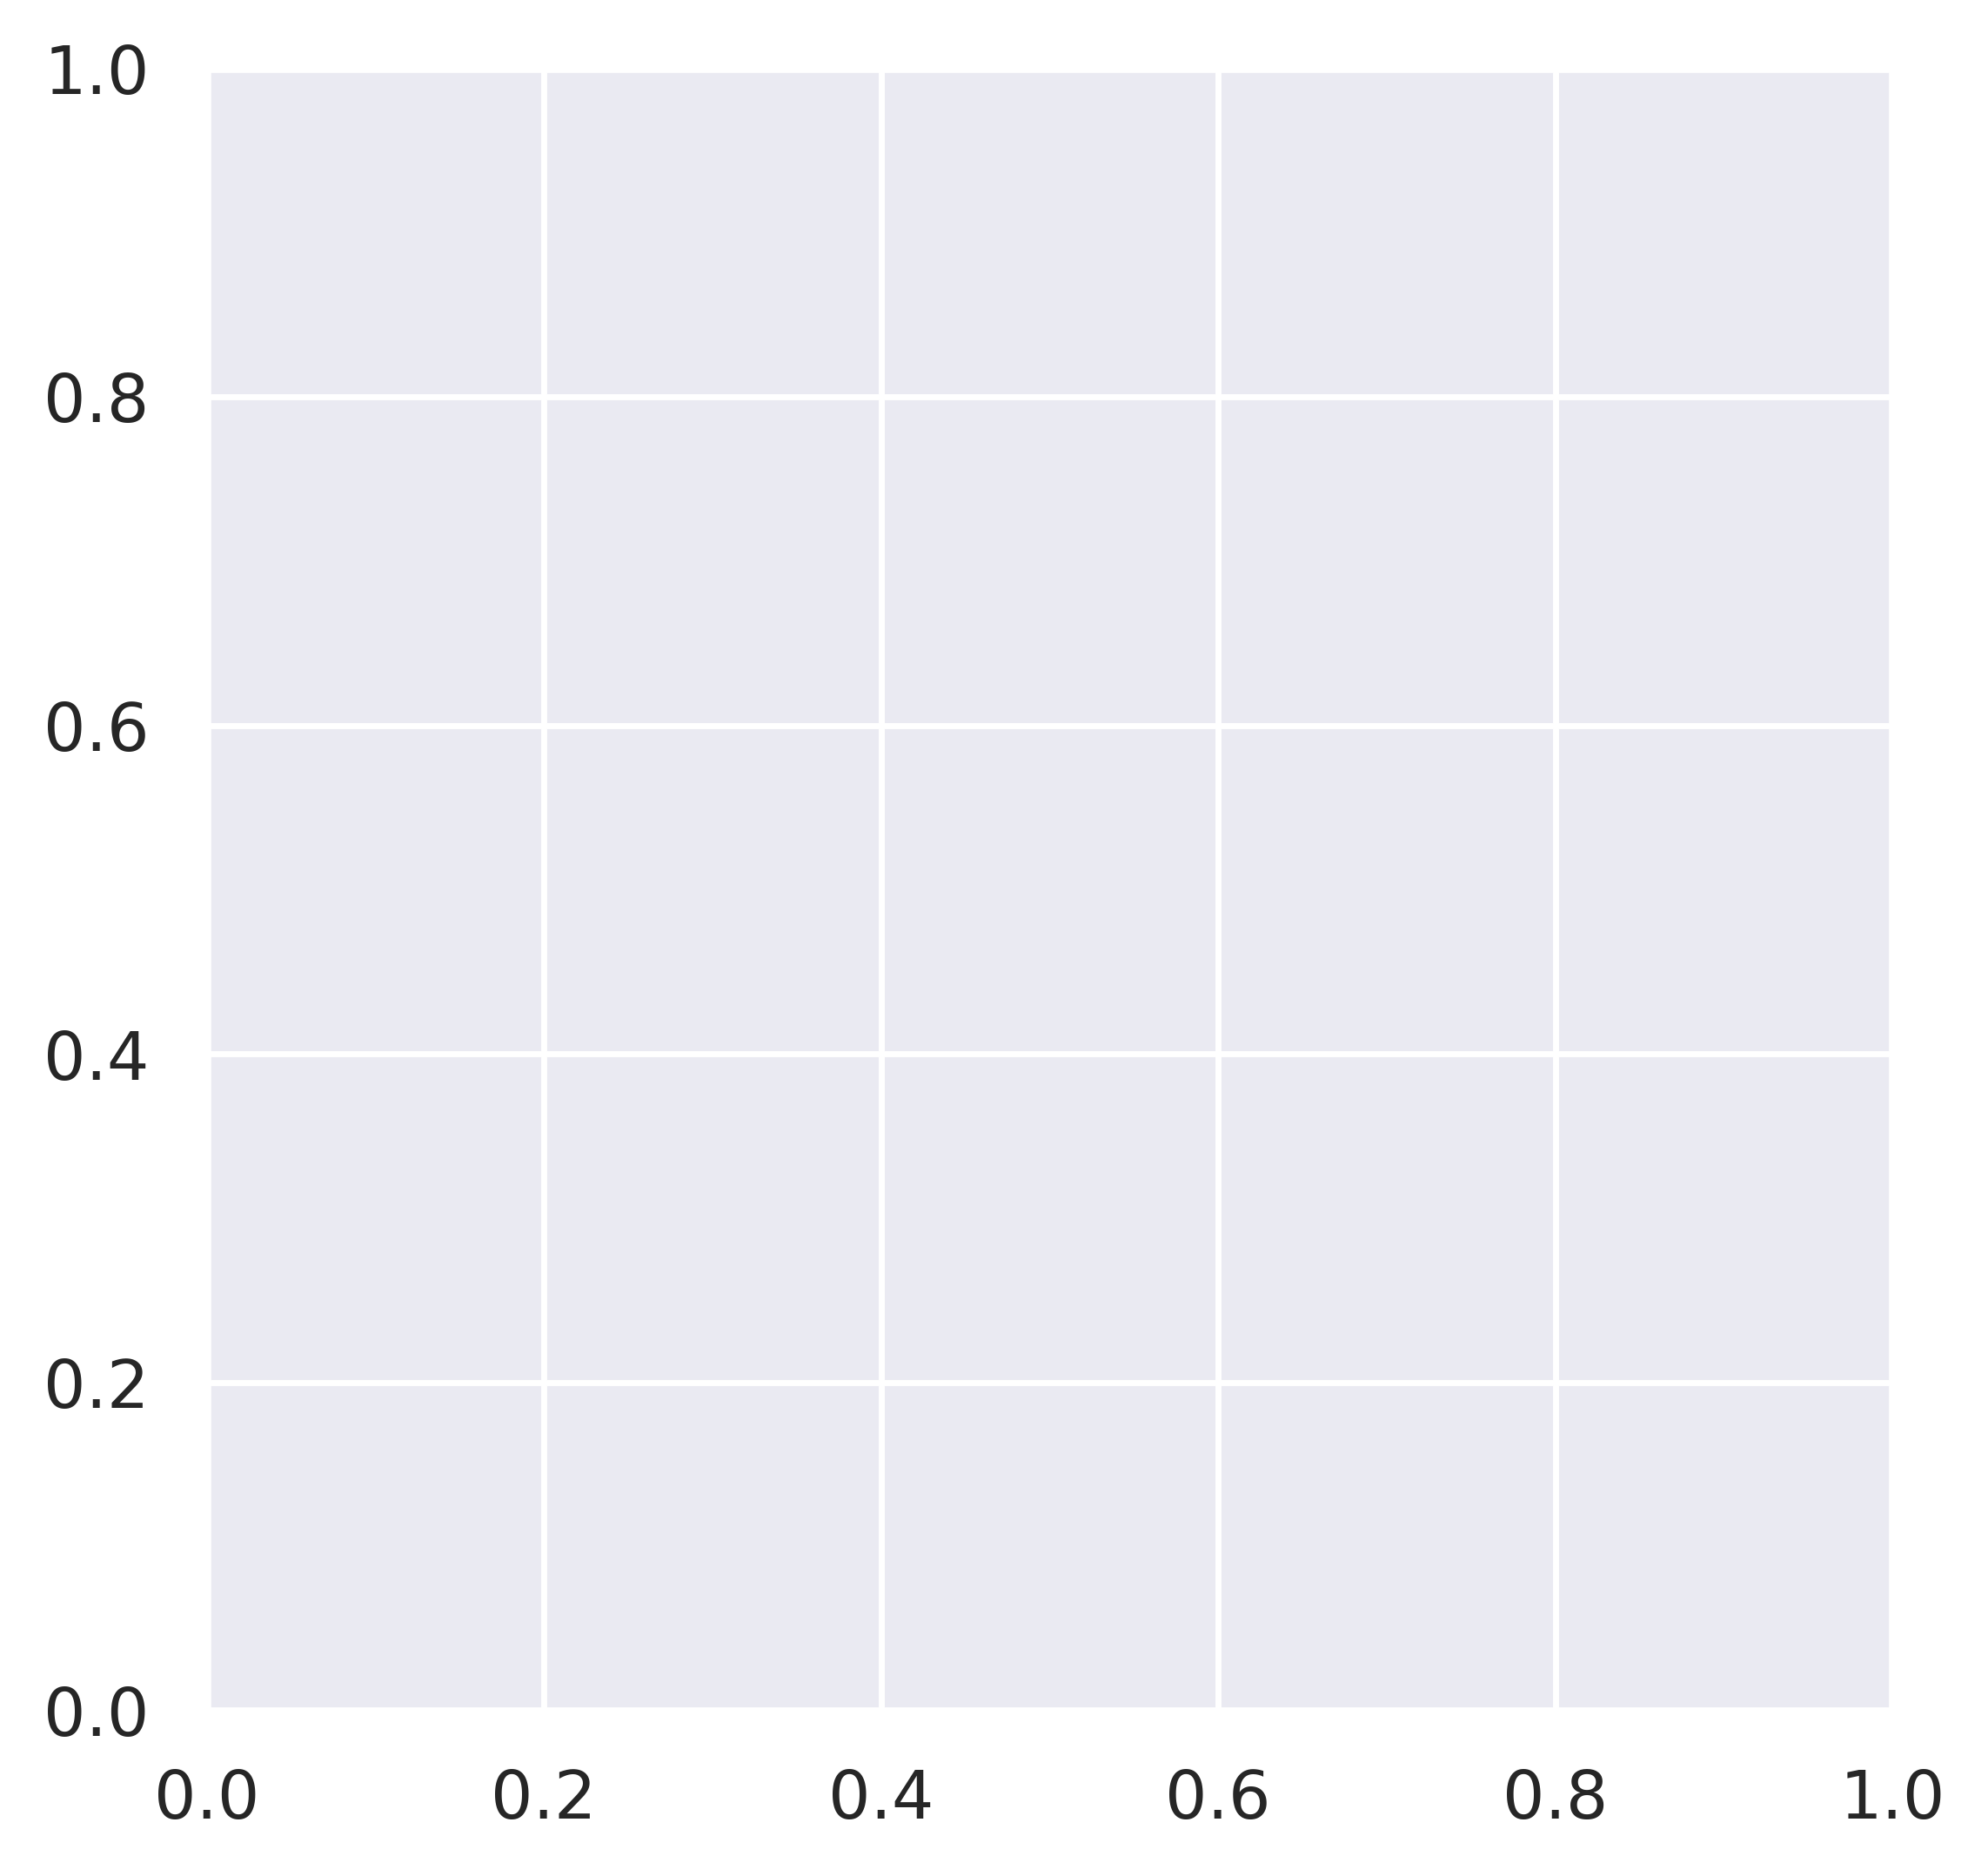

In [43]:
fig, ax = plt.subplots(figsize=(5,5),dpi=500)
ax.hist(time_list, bins=240, color='b', edgecolor='orange')

cm = plt.cm.get_cmap('RdYlBu_r')

# ax.set_xlim([0,20])
# ax.set_ylim([0,500])
ax.set_ylabel('Number of Accident')
ax.set_xlabel('Hours of the Day')
ax.set_title('Accident Count throughout the Day')
ax.grid(False)


plt.xticks([], rotation='horizontal')

plt.tight_layout()
# plt.savefig('../img/accident-count-throughout-the-day-2.png', dpi = 300)

Create Location Datafram to Clear NaN Safely

In [18]:
df_loc = pd.DataFrame()
df_loc['Start_Lat'] = df_test['Start_Lat']
df_loc['Start_Lng'] = df_test['Start_Lng']
df_loc['End_Lat'] = df_test['End_Lat']
df_loc['End_Lng'] = df_test['End_Lng']
df_loc['Distance(mi)'] = df_test['Distance(mi)']

df_loc

Start_Lat   Start_Lng   End_Lat    End_Lng  Distance(mi)
0        39.865147  -84.058723       NaN        NaN         0.010
1        39.928059  -82.831184       NaN        NaN         0.010
2        39.063148  -84.032608       NaN        NaN         0.010
3        39.747753  -84.205582       NaN        NaN         0.010
4        39.627781  -84.188354       NaN        NaN         0.010
...            ...         ...       ...        ...           ...
2974330  34.002480 -117.379360  33.99888 -117.37094         0.543
2974331  32.766960 -117.148060  32.76555 -117.15363         0.338
2974332  33.775450 -117.847790  33.77740 -117.85727         0.561
2974333  33.992460 -118.403020  33.98311 -118.39565         0.772
2974334  34.133930 -117.230920  34.13736 -117.23934         0.537

[2974335 rows x 5 columns]

In [19]:
df_loc.dropna(inplace=True)
df_loc

Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)
2246264   40.10891  -83.09286  40.11206  -83.03187         3.230
2246265   39.86542  -84.06280  39.86501  -84.04873         0.747
2246266   39.10266  -84.52468  39.10209  -84.52396         0.055
2246267   39.10148  -84.52341  39.09841  -84.52241         0.219
2246268   41.06213  -81.53784  41.06217  -81.53547         0.123
...            ...        ...       ...        ...           ...
2974330   34.00248 -117.37936  33.99888 -117.37094         0.543
2974331   32.76696 -117.14806  32.76555 -117.15363         0.338
2974332   33.77545 -117.84779  33.77740 -117.85727         0.561
2974333   33.99246 -118.40302  33.98311 -118.39565         0.772
2974334   34.13393 -117.23092  34.13736 -117.23934         0.537

[728071 rows x 5 columns]

In [20]:
df_loc['Loc_Distance(Deg)'] = (
        (
        (df_loc['Start_Lat'] - df_loc['End_Lat'])**2
        +
        (df_loc['Start_Lng'] - df_loc['End_Lng'])**2)**(1/2)
    )
df_loc

Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
2246264   40.10891  -83.09286  40.11206  -83.03187         3.230   
2246265   39.86542  -84.06280  39.86501  -84.04873         0.747   
2246266   39.10266  -84.52468  39.10209  -84.52396         0.055   
2246267   39.10148  -84.52341  39.09841  -84.52241         0.219   
2246268   41.06213  -81.53784  41.06217  -81.53547         0.123   
...            ...        ...       ...        ...           ...   
2974330   34.00248 -117.37936  33.99888 -117.37094         0.543   
2974331   32.76696 -117.14806  32.76555 -117.15363         0.338   
2974332   33.77545 -117.84779  33.77740 -117.85727         0.561   
2974333   33.99246 -118.40302  33.98311 -118.39565         0.772   
2974334   34.13393 -117.23092  34.13736 -117.23934         0.537   

         Loc_Distance(Deg)  
2246264           0.061071  
2246265           0.014076  
2246266           0.000918  
2246267           0.003229  
2246268           0.002370  
...                    ...  
2974330           0.009157  
2974331           0.005746  
2974332           0.009678  
2974333           0.011905  
2974334           0.009092  

[728071 rows x 6 columns]

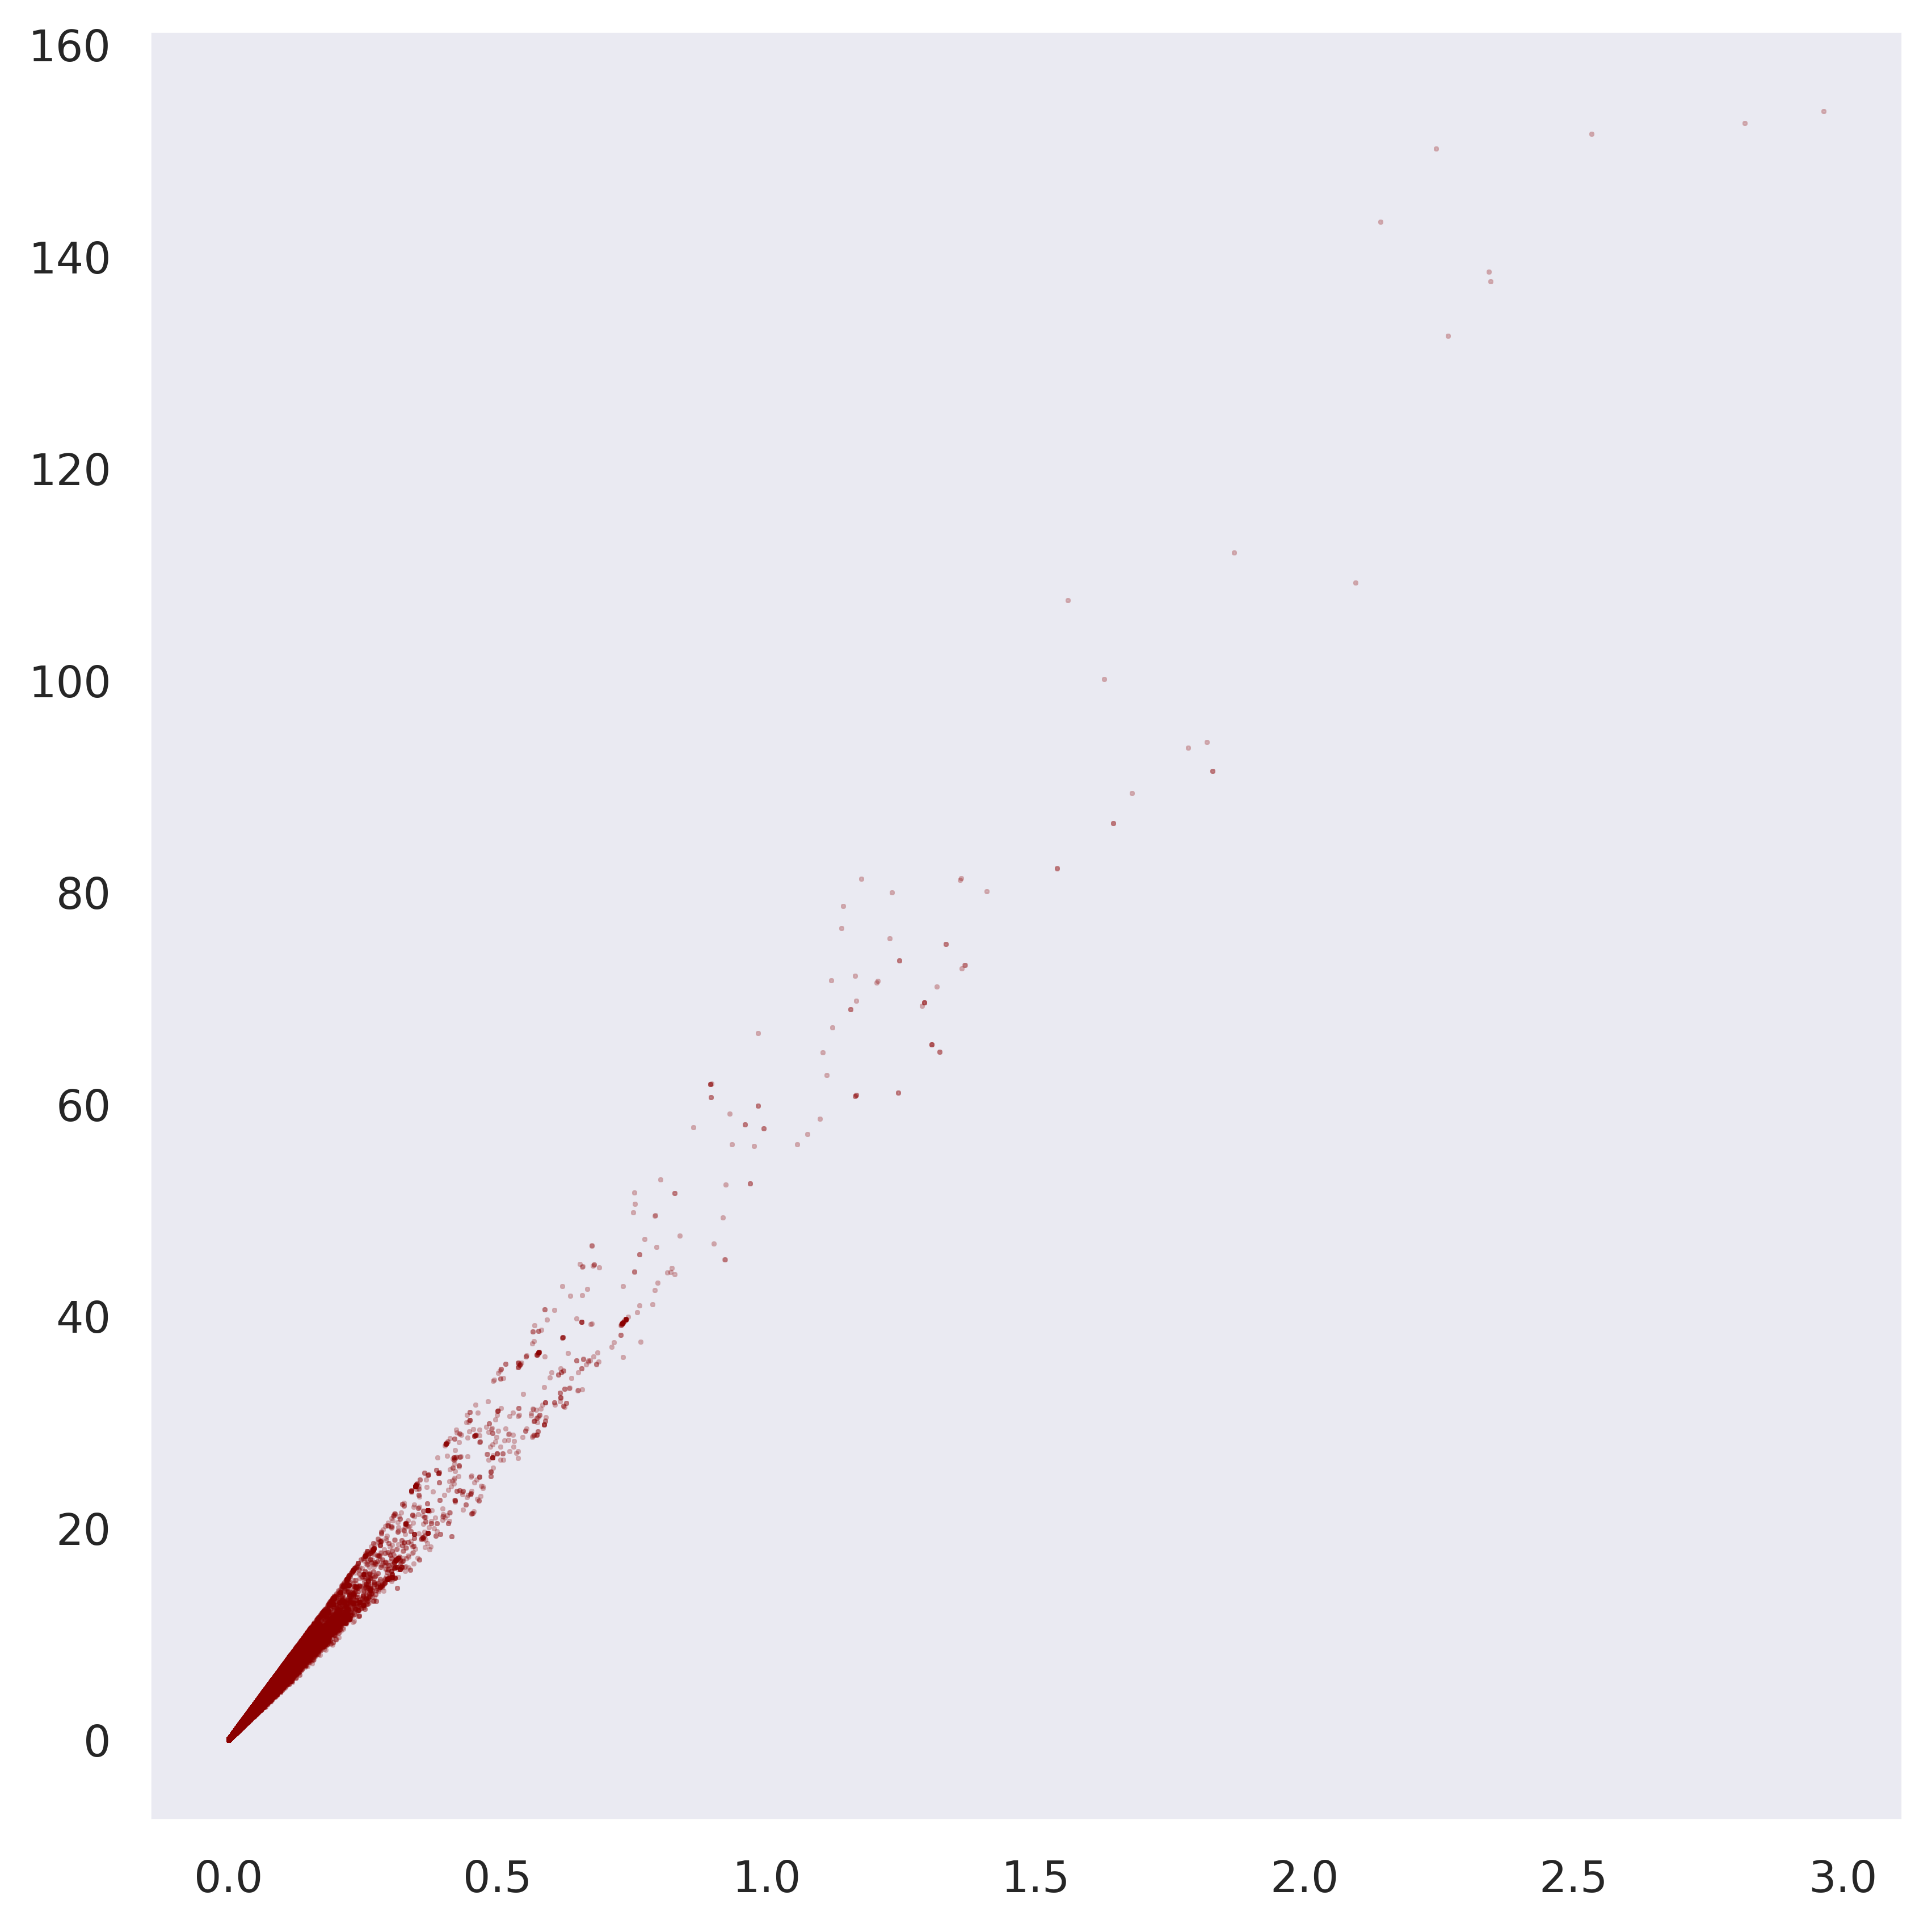

In [21]:
fig, ax = plt.subplots(figsize=(7,7),dpi=500)
ax.scatter(df_loc['Loc_Distance(Deg)'], df_loc['Distance(mi)'],c='darkred', alpha=0.3, marker=',',s=0.1)
# ax.set_xlim([-105.2,-104.8])
# ax.set_ylim([39.6,39.86])
# ax.set_ylabel('Latitude')
# ax.set_xlabel('Longitude')
# ax.set_title('Accident Map')
ax.grid(False)
plt.tight_layout()

Strong Correlation between Distance and Calculated distance from start/end lat/long

Find Error of Lat/Long!

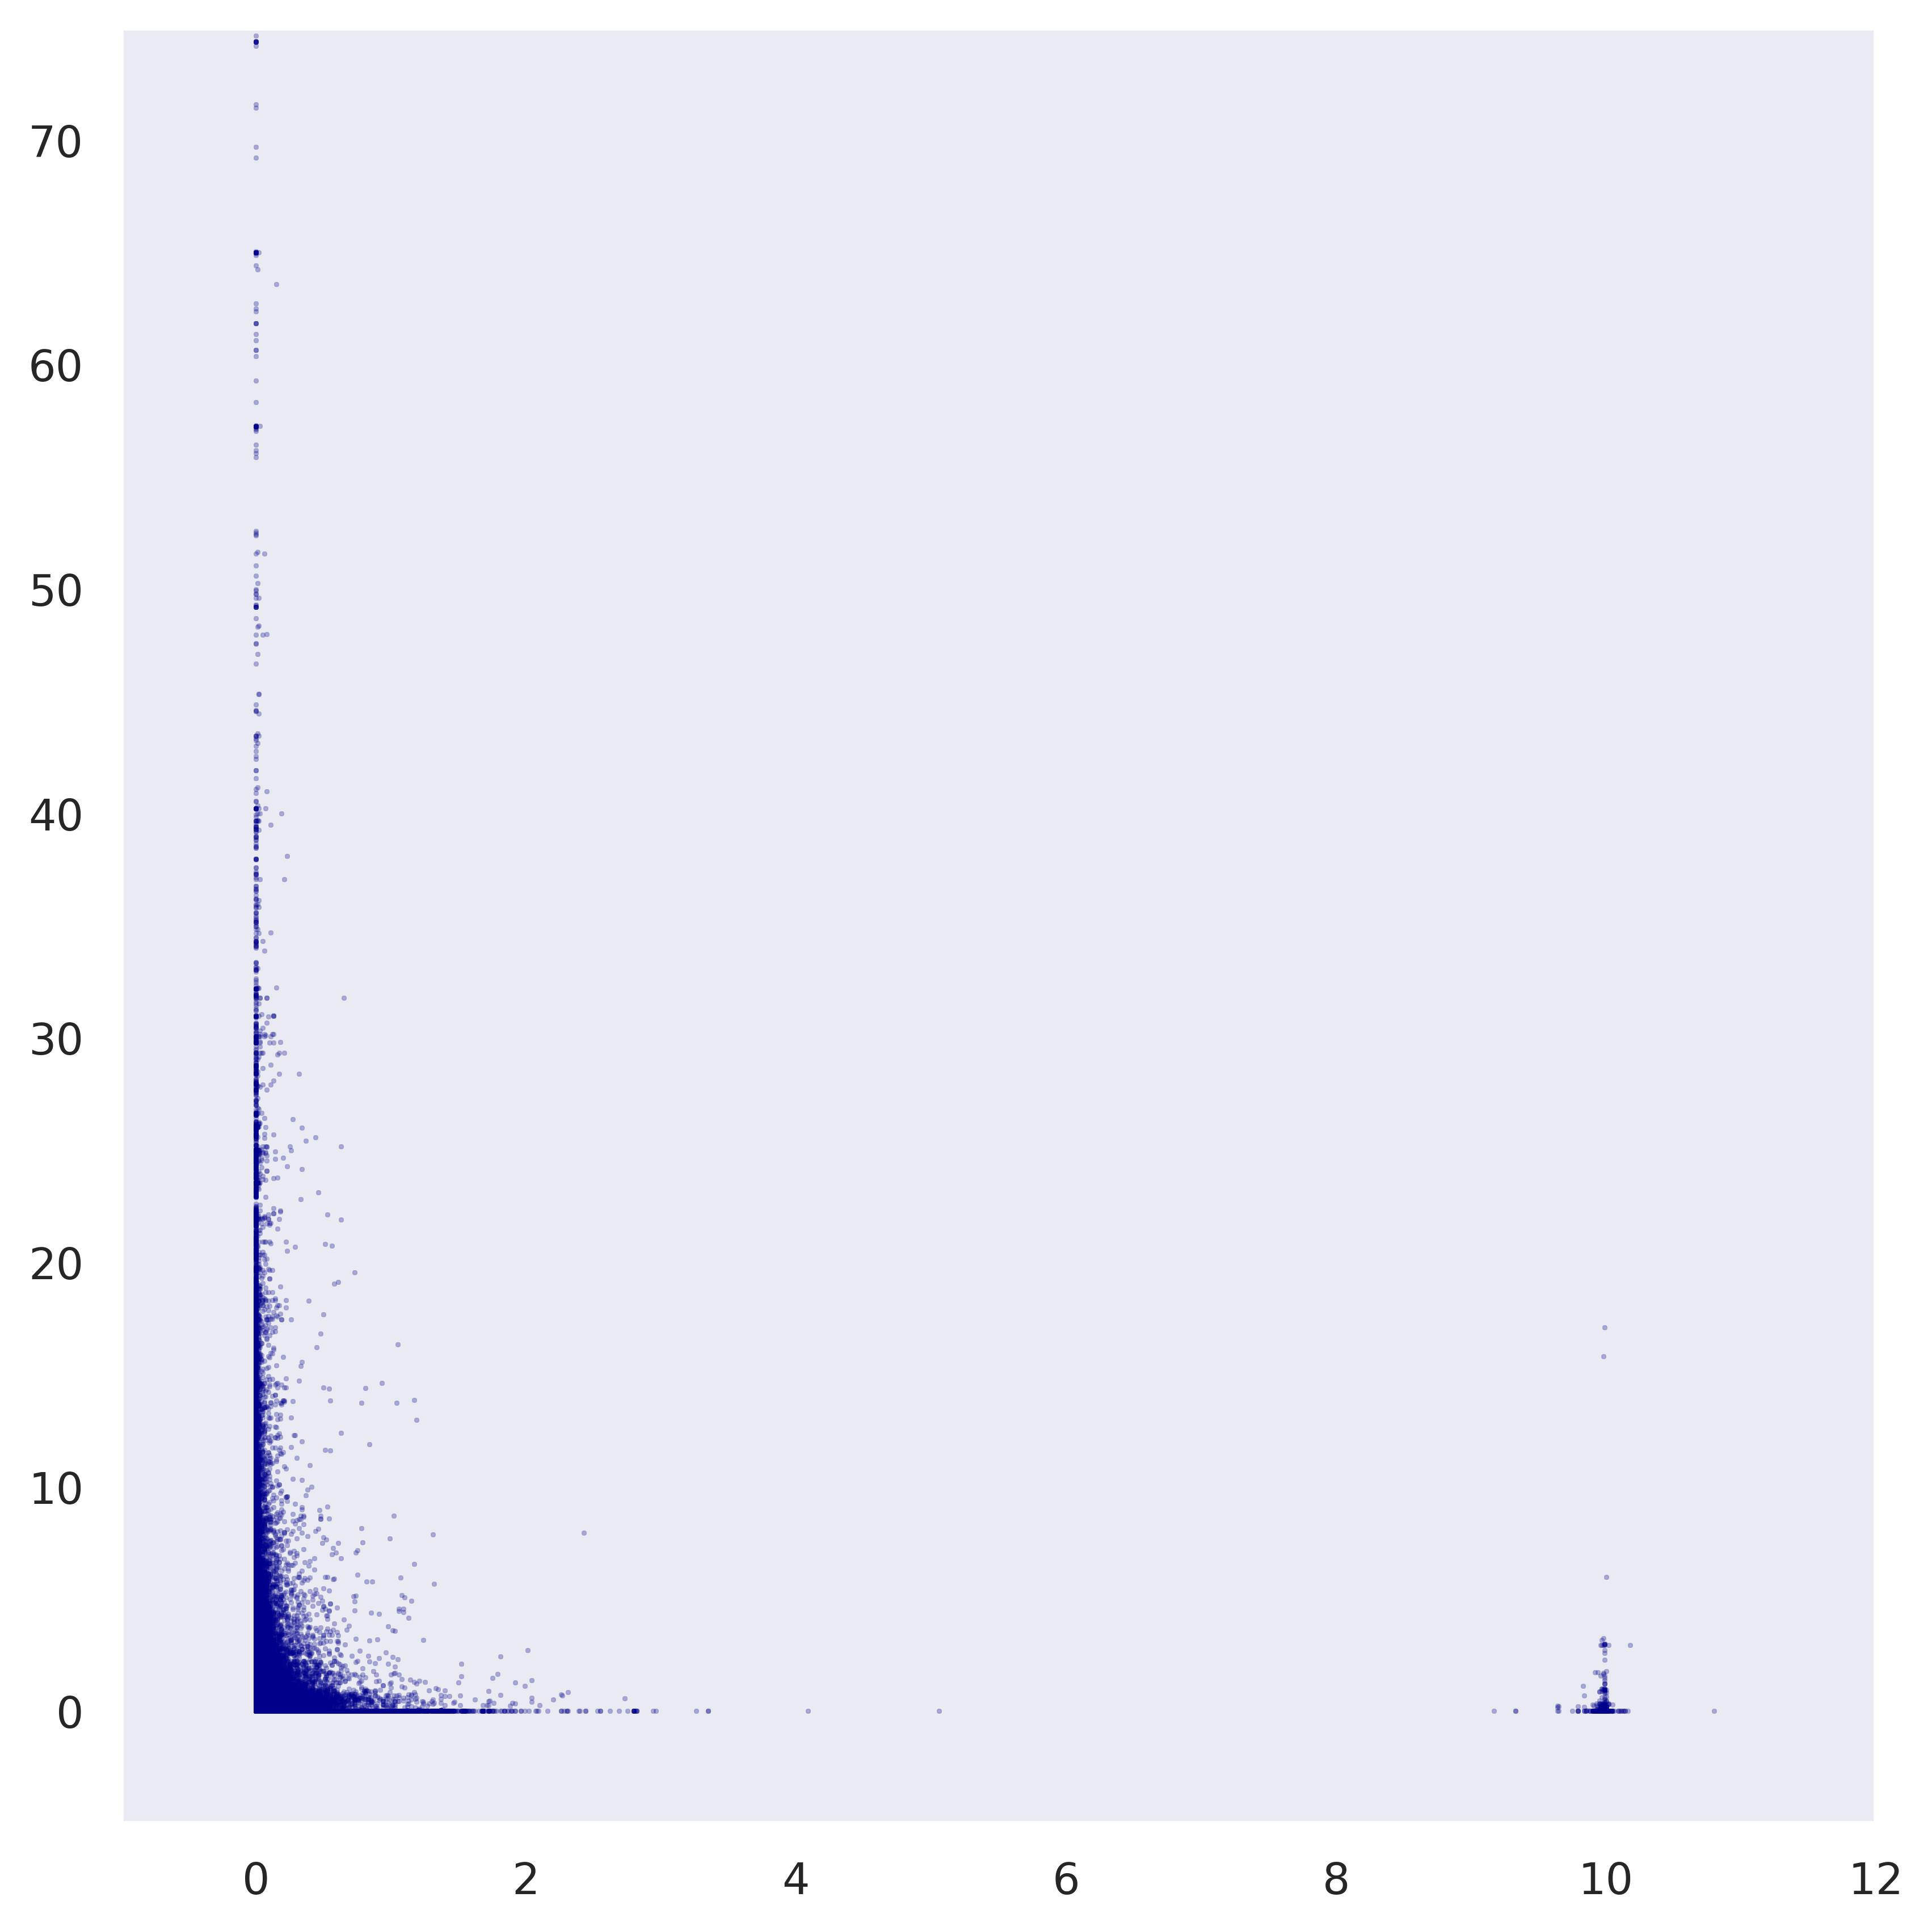

In [22]:
fig, ax = plt.subplots(figsize=(7,7),dpi=500)
ax.scatter(df_test['Precipitation(in)'], df_test['Distance(mi)'],c='darkblue', alpha=0.3, marker=',',s=0.1)
ax.set_xlim([-1,12])
ax.set_ylim([-5,75])
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Accident Map')
ax.grid(False)
plt.tight_layout()

No relation between precipitation and distance

Try time of day vs distance?

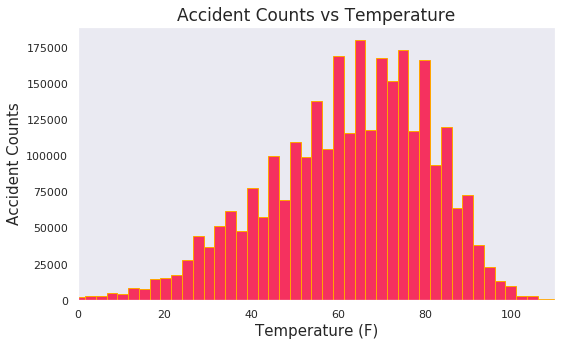

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df_test['Temperature(F)'].dropna(), bins=100, color='#f5315f',edgecolor='orange')
ax.set_xlim([0,110])
ax.set_ylabel('Accident Counts', fontsize = 15)
ax.set_xlabel('Temperature (F)', fontsize = 15)
ax.set_title('Accident Counts vs Temperature', fontsize = 17)
ax.grid(False)
plt.tight_layout()
plt.savefig('../img/temp_counts.png')

Accident count vs Temperature

Normal distribution with right skew?

# Denver Map

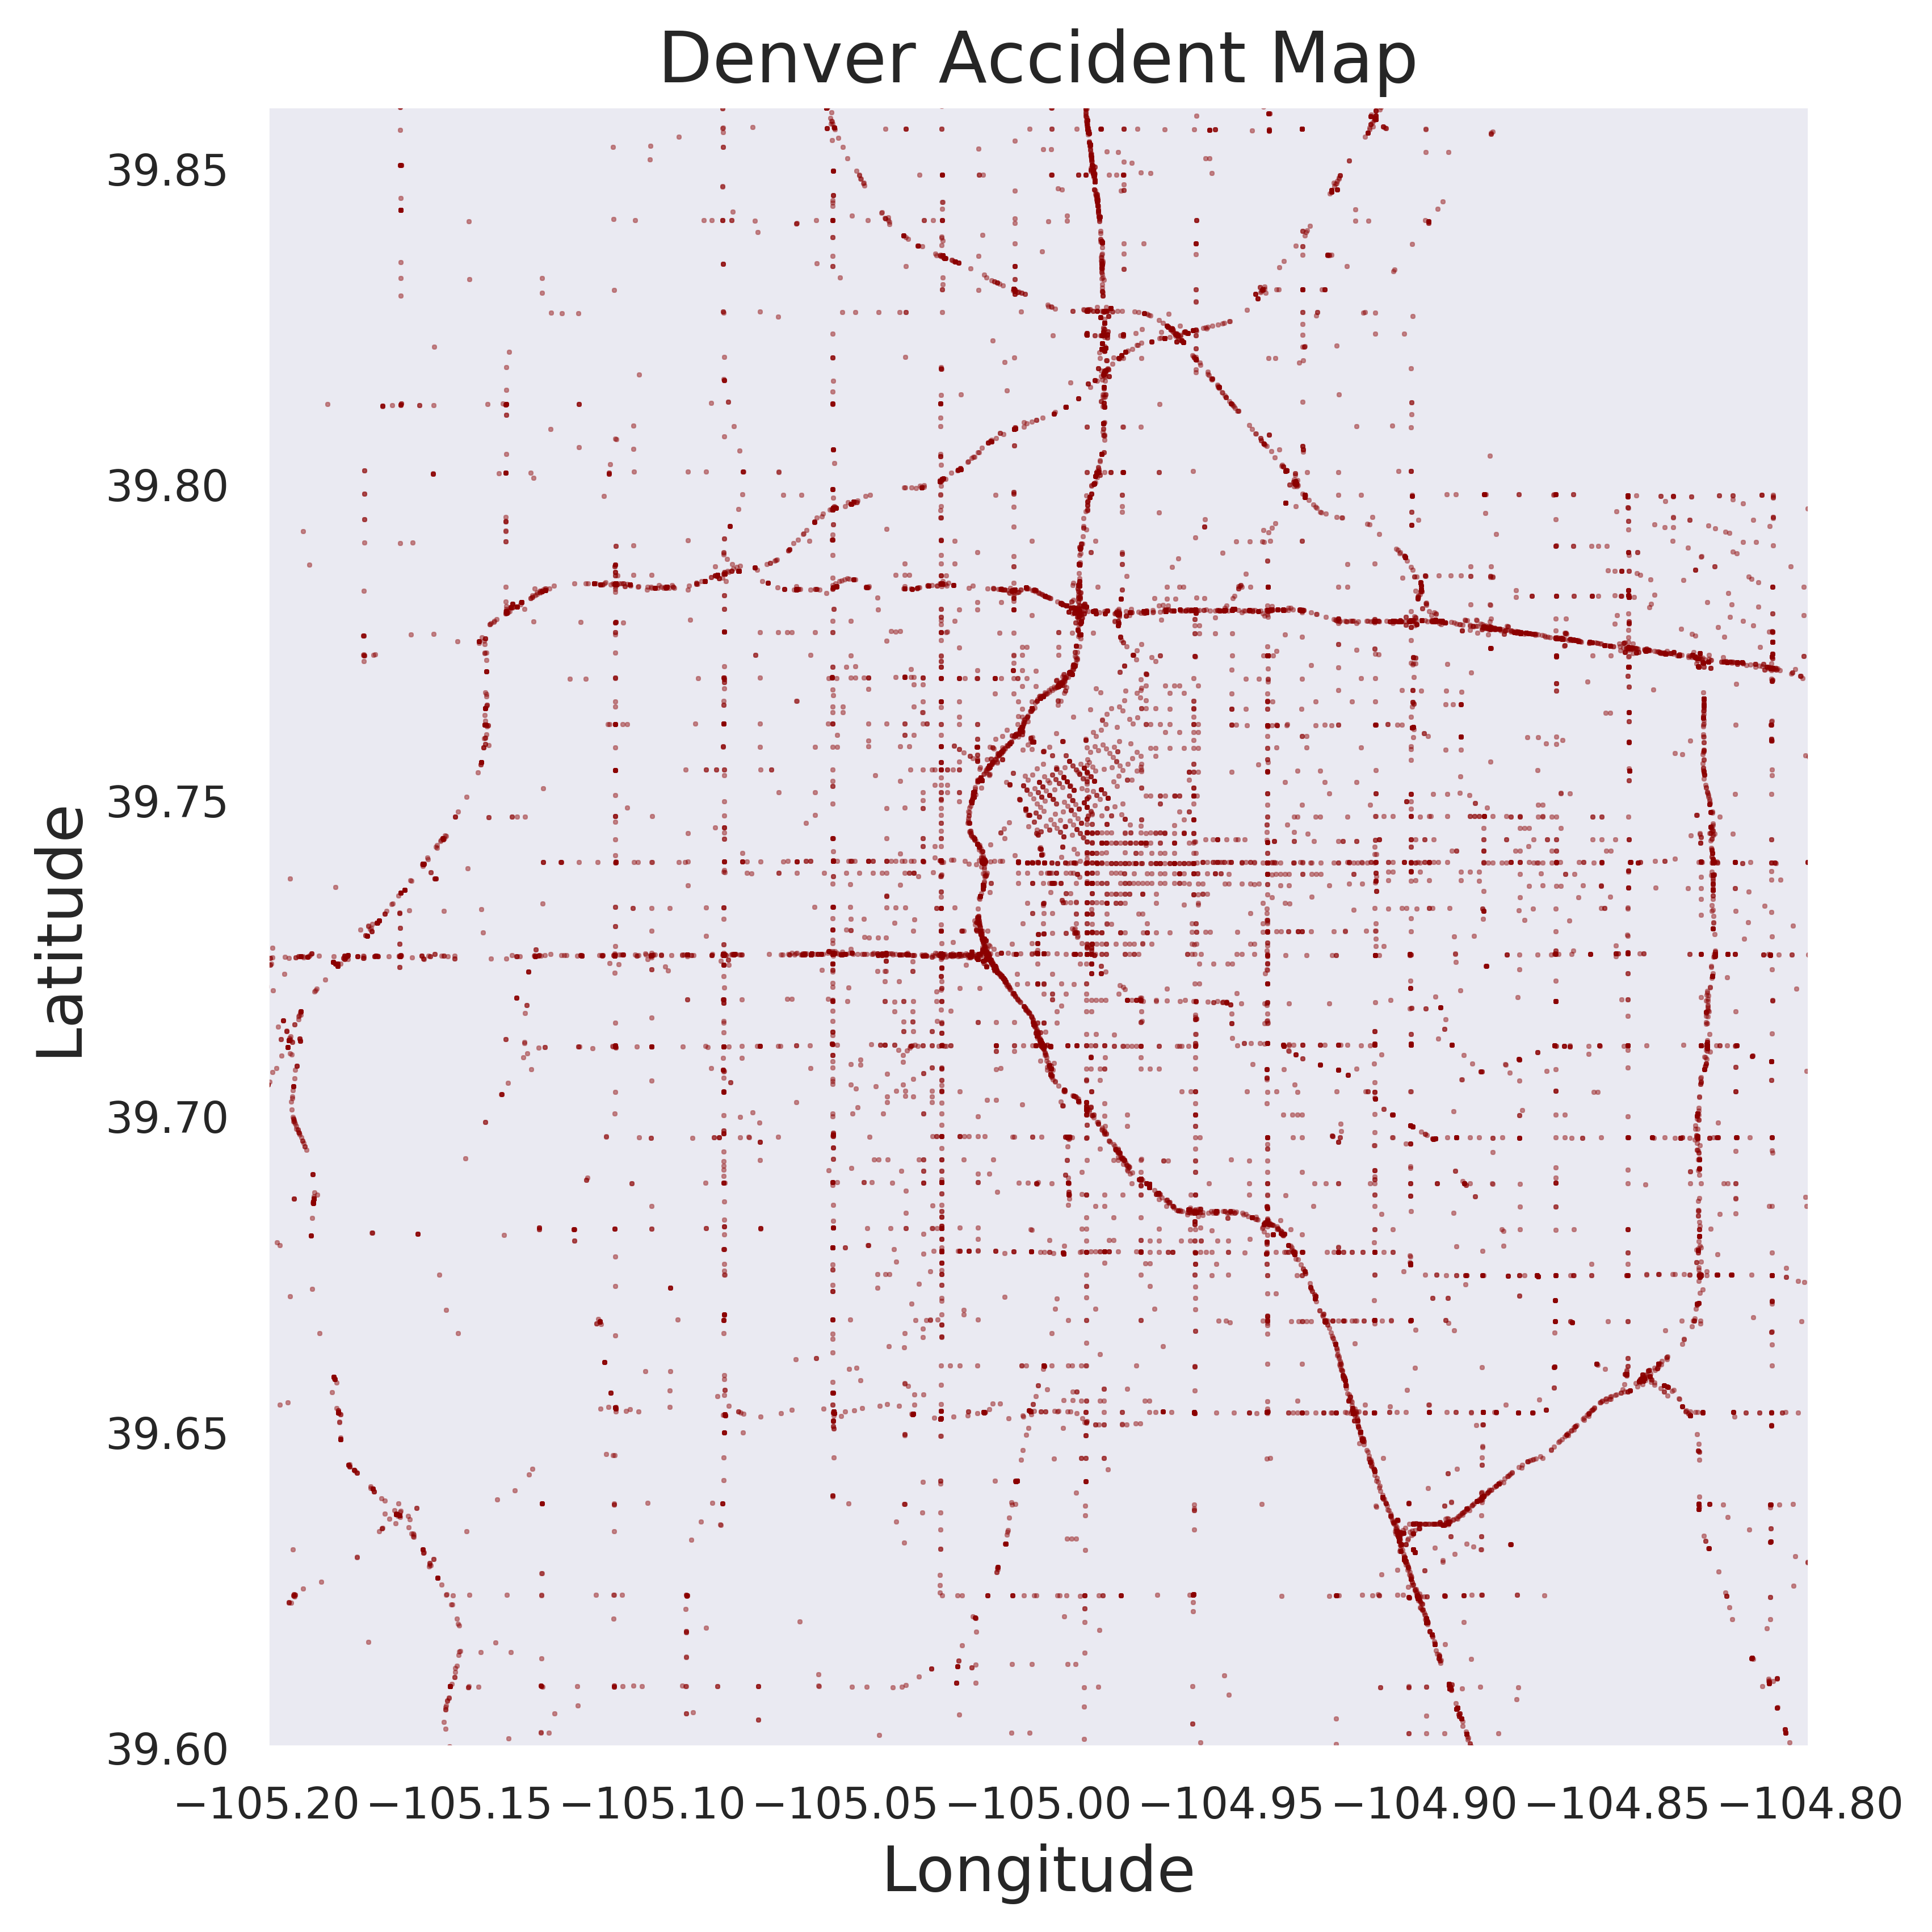

In [7]:
fig, ax = plt.subplots(figsize=(7,7),dpi=500)
ax.scatter(df_test['Start_Lng'], df_test['Start_Lat'],c='darkred', alpha=0.5, marker=',',s=0.05)
ax.set_xlim([-105.2,-104.8])
ax.set_ylim([39.6,39.86])
ax.set_ylabel('Latitude', fontsize = 16)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_title('Denver Accident Map', fontsize = 18)
ax.grid(False)
plt.tight_layout()

# NYC Accident Map

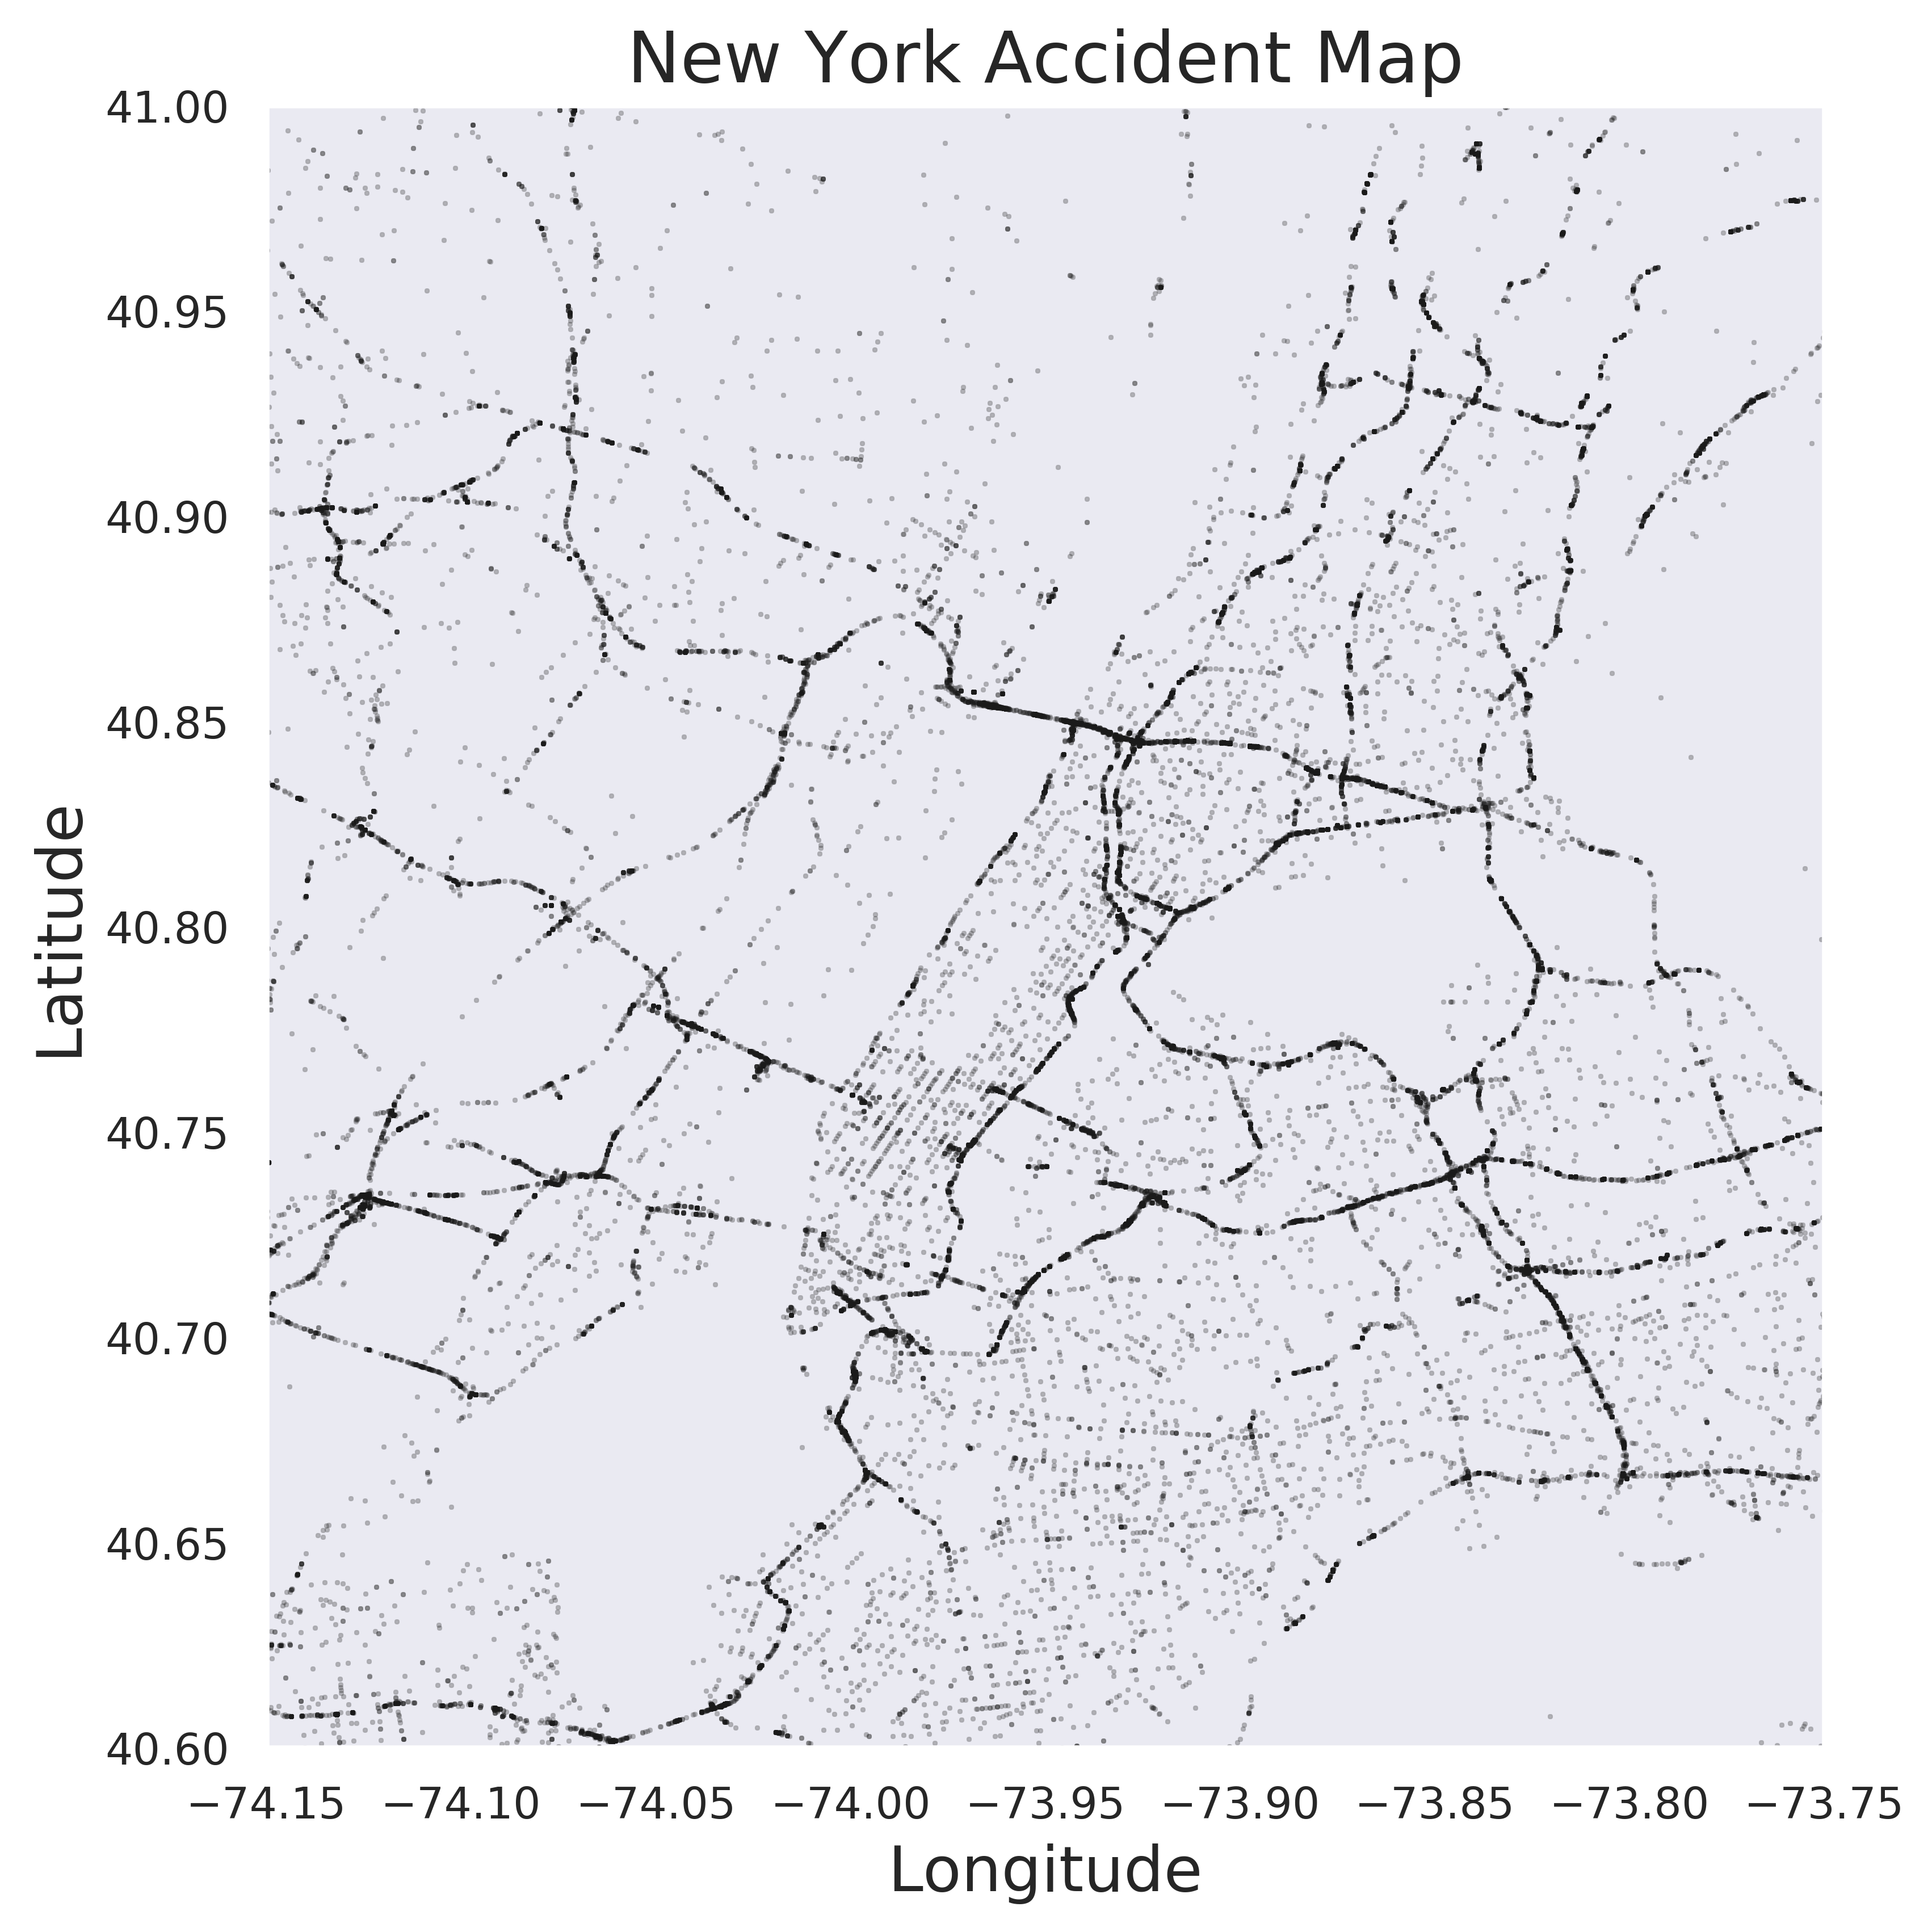

In [9]:
fig, ax = plt.subplots(figsize=(7,7), dpi=500)
ax.scatter(df_test['Start_Lng'], df_test['Start_Lat'],c='k', alpha='0.3', marker=',',s=0.05)
ax.set_xlim([-74.15,-73.75])
ax.set_ylim([40.6,41.0])
ax.set_ylabel('Latitude', fontsize = 16)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_title('New York Accident Map', fontsize = 18)
ax.grid(False)
plt.tight_layout()

# California Accidents

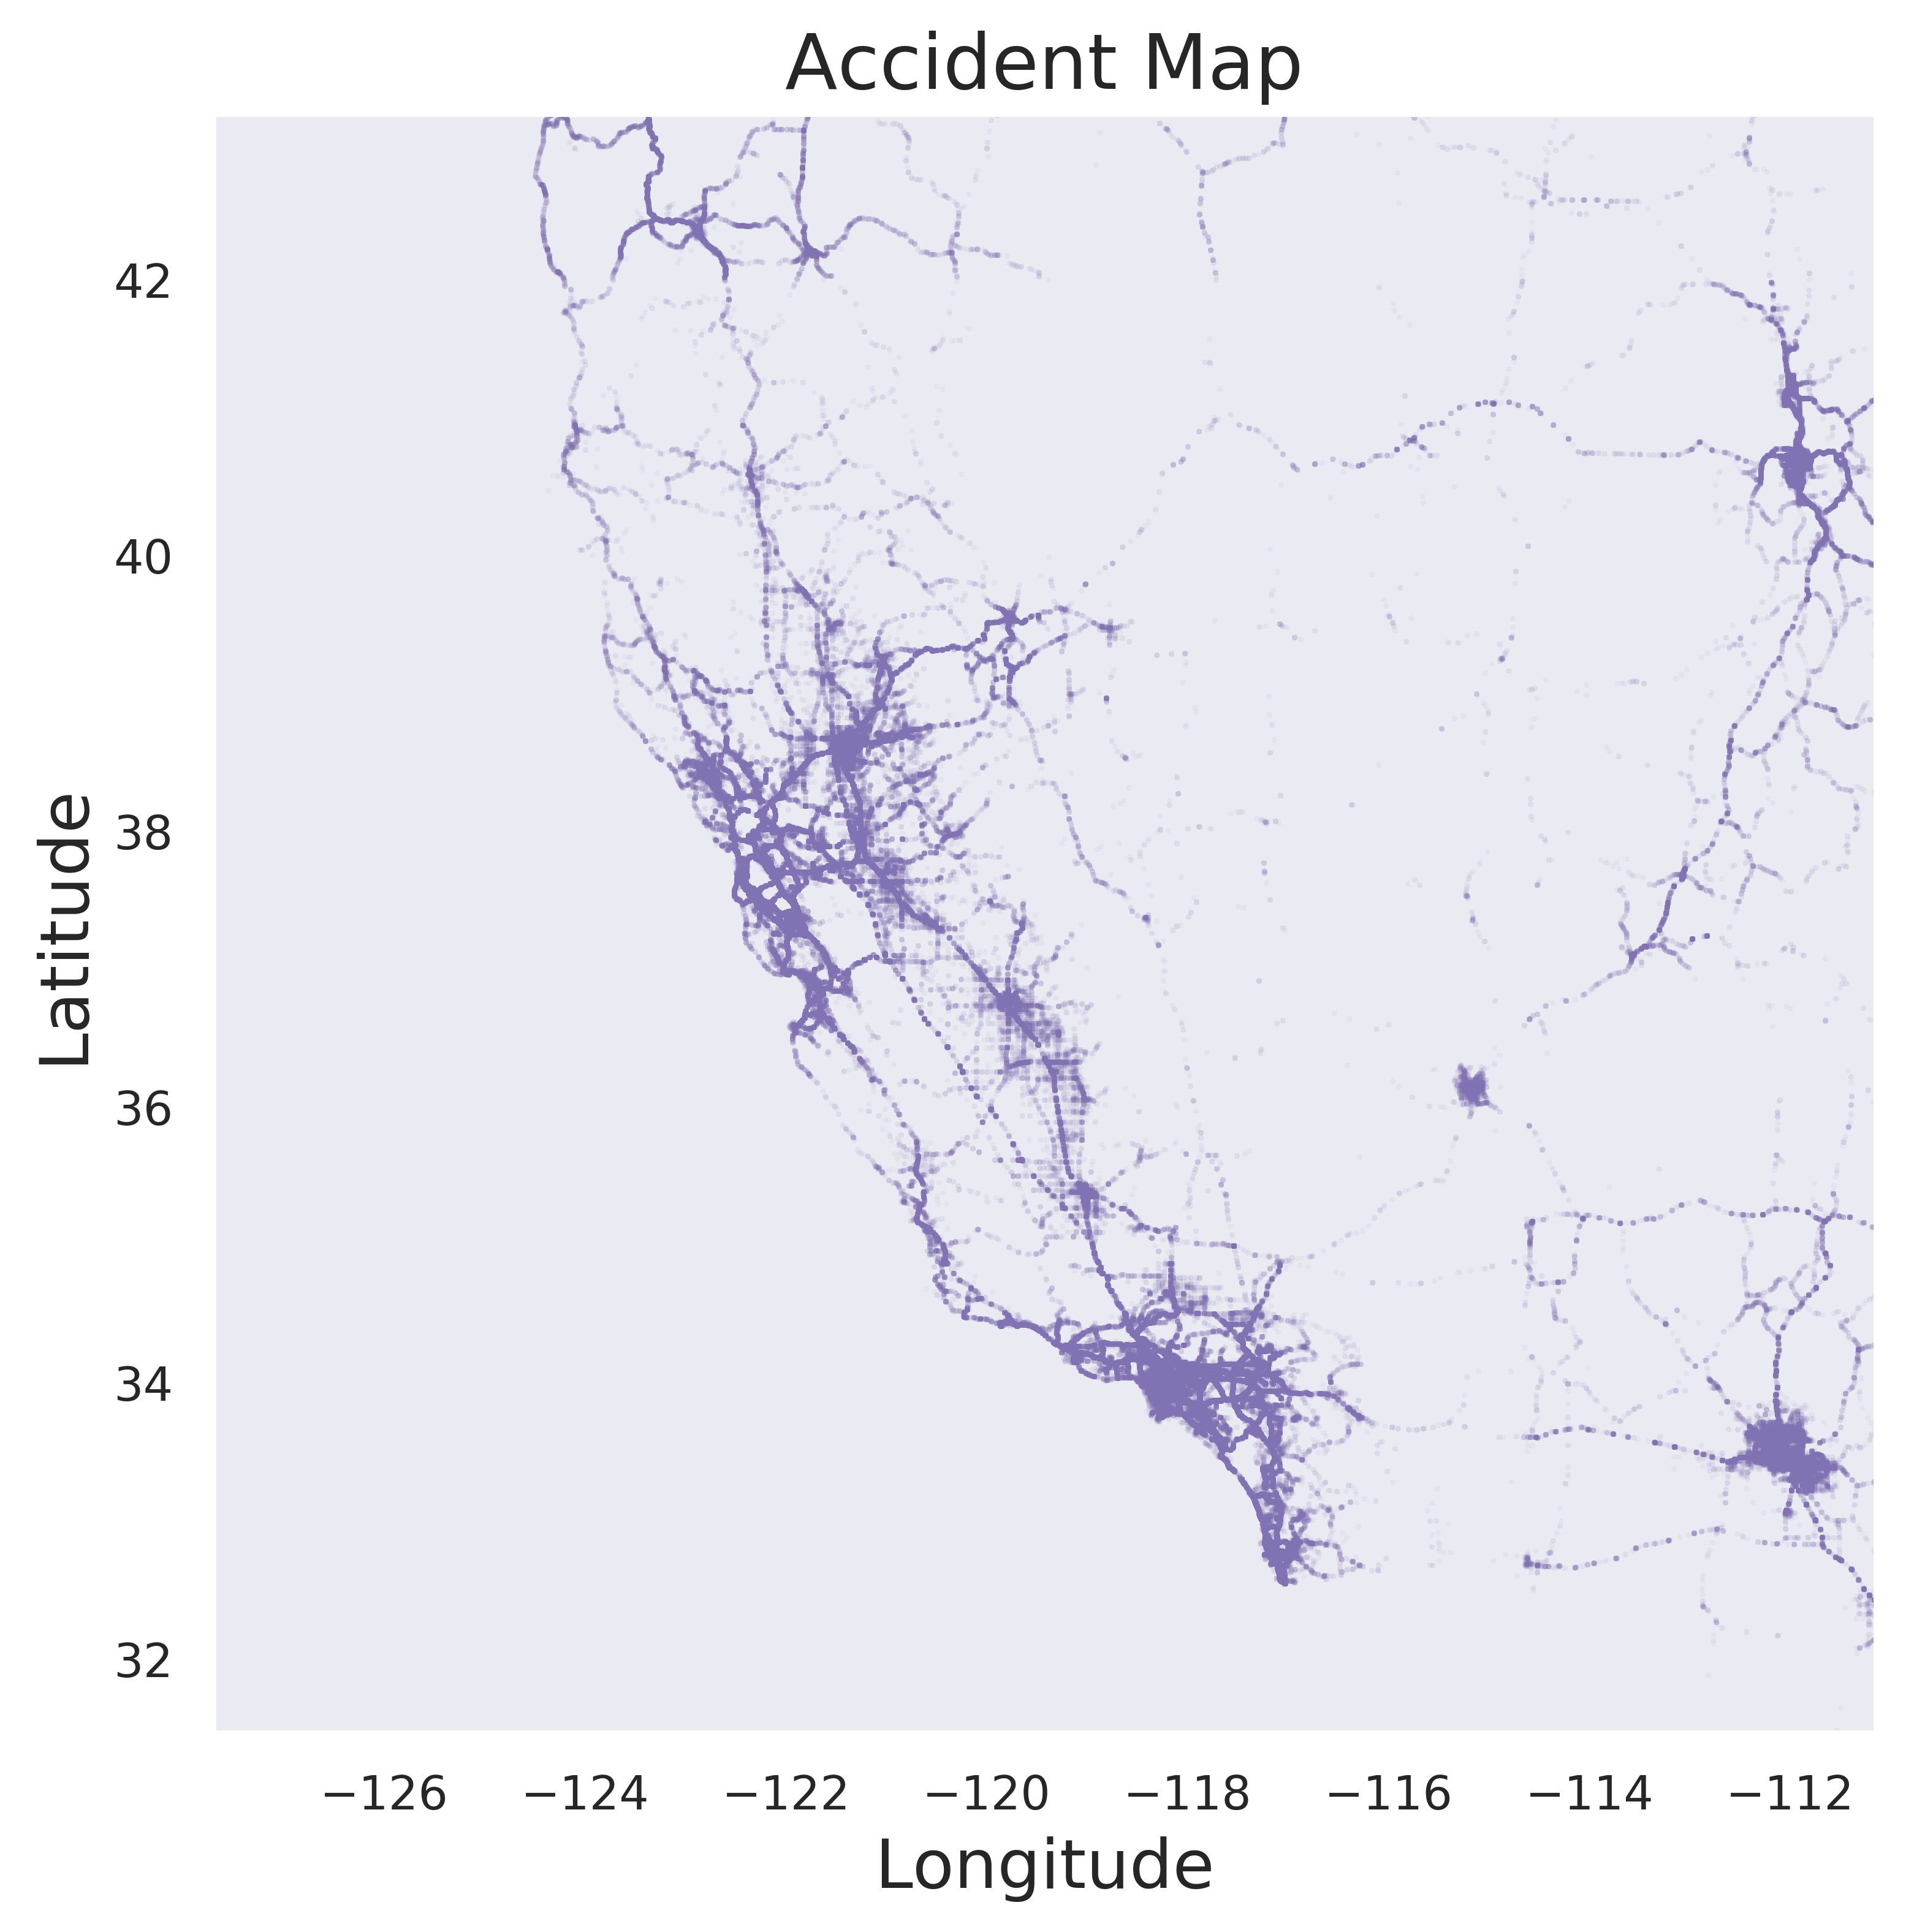

In [8]:
fig, ax = plt.subplots(figsize=(7,7), dpi=500)
ax.scatter(df_test['Start_Lng'], df_test['Start_Lat'],c='m', marker=',',alpha=0.06,s=0.05)
ax.set_xlim([-127.7, -111.15])
ax.set_ylim([31.46,43.2])
ax.set_ylabel('Latitude', fontsize = 16)
ax.set_xlabel('Longitude', fontsize = 16)
ax.set_title('Accident Map', fontsize = 18)
ax.grid(False)

# add a map with accident rates / population to find patern of highest accident rates

 - find population/town or pop/county dataset 
 - merge datasets 
 - Normalize (relativize) accident rates by population ( and possibly by cars/town )
 - plot map of usa with relativized accident rates to find patterns
 - patterns: north vs south, coast vs inland, state by state, rural vs urban, suburban vs ..., denver , new york
 

In [30]:
# Initialize interactive map + location + zoom
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
boroughs = gpd.read_file(
    gpd.datasets.get_path('nybb')
)

In [42]:
df_geo_nyc = gpd.GeoDataFrame(
    df_nyc, geometry=gpd.points_from_xy(df_nyc.Start_Lng, df_nyc.Start_Lat)
    )

In [18]:
df_geo_points100 = gpd.GeoDataFrame(
    df_test100, geometry=gpd.points_from_xy(df_test100.Start_Lng, df_test100.Start_Lat)
    )

In [20]:
df_geo_points10 = gpd.GeoDataFrame(
    df_test10, geometry=gpd.points_from_xy(df_test10.Start_Lng, df_test10.Start_Lat)
    )

In [14]:
df_geo_points = gpd.GeoDataFrame(
    df_test, geometry=gpd.points_from_xy(df_test.Start_Lng, df_test.Start_Lat)
    )

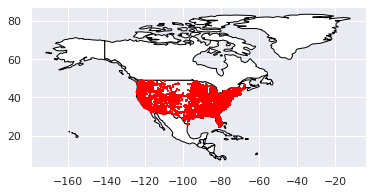

In [66]:
# We restrict to North America.
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
df_geo_points10.plot(ax=ax, color='red', marker=",", markersize=1)

plt.show()

AttributeError: 'Line2D' object has no property 'edgecolor'

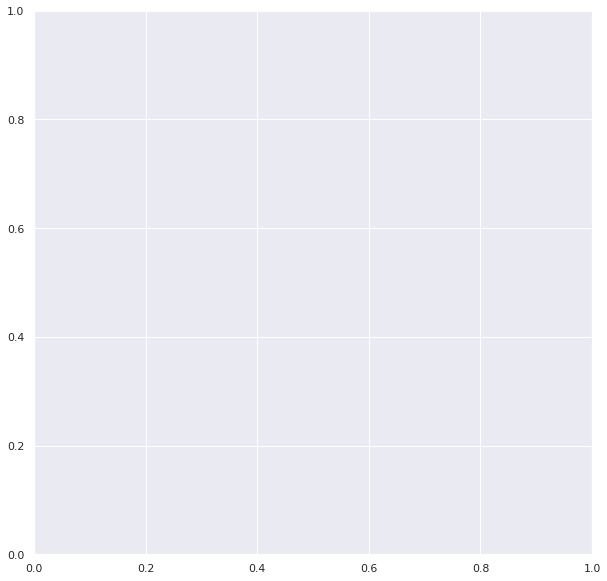

In [71]:
boroughs = boroughs.to_crs(epsg=3857)

ax = df_nyc.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=12)

# # We restrict to NYC
# ax = boroughs.plot(
#         figsize=(7,7),
#         color='white',
#         edgecolor='black'
#         )

# # We can now plot our ``GeoDataFrame``.
# df_geo_nyc.plot(ax=ax, color='red')

In [10]:
# lat_list=[]
# lng_list=[]
# for lat in df_test['Start_Lat']:
#     lat_list.append(lat)
# for lng in df_test['Start_Lng']:
#     lng_list.append(lng)

In [ ]:
folium_map